# Get Started

Alex Schittko

Robert Waguespack

Run this block to set up the notebook

**You must enable Internet in Kaggle before running this notebook!**

**This requires you to verify your Kaggle account!**

* Download CSV Files test/training sets
* Import python dependencies

Goal is to [predict box office revenues](https://www.kaggle.com/c/tmdb-box-office-prediction/submit)

In [71]:
output_path = "./" # Where are outputs stored in your notebook? (With trailing slash, eg /output/)
### input_path = "../input/tmdb-box-office-prediction/" # Where can inputs be stored? (With trailing slash, eg /input/)

# Uncomment these if the test.csv and train.csv don't exist in INPUT_PATH
#!wget -q --show-progress --no-check-certificate 'https://docs.google.com/uc?export=download&id=13f3n4H67RjbEHPl_A4i9R6oY9jUa2eOm' -O {input_path}test.csv
#!wget -q --show-progress --no-check-certificate 'https://docs.google.com/uc?export=download&id=1JxEPMg415Y6NIslXcL9mWGr8RMx86B6Y' -O {input_path}train.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mno
import math
import json
from multiprocessing import Pool
import multiprocessing
from tqdm import tqdm,trange,tqdm_notebook
from time import sleep
from sklearn.model_selection import train_test_split
print("Ready")

Ready


In [72]:
df_train = pd.read_csv('train.csv', parse_dates=["release_date"])
df_test = pd.read_csv('test.csv', parse_dates=["release_date"])
df_test.info()
df_all = pd.concat([df_train, df_test])
df_all.reset_index(inplace=True)

# Initialize your new features here
df_all['cast_json'] = ""
df_all['crew_json'] = ""
df_all.insert(0, 'popularity_cast', np.float64(0))
df_all.insert(0, 'popularity_crew', np.float64(0))
df_all.insert(0, 'has_homepage', 0)
df_all.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     4398 non-null   int64         
 1   belongs_to_collection  877 non-null    object        
 2   budget                 4398 non-null   int64         
 3   genres                 4382 non-null   object        
 4   homepage               1420 non-null   object        
 5   imdb_id                4398 non-null   object        
 6   original_language      4398 non-null   object        
 7   original_title         4398 non-null   object        
 8   overview               4384 non-null   object        
 9   popularity             4398 non-null   float64       
 10  poster_path            4397 non-null   object        
 11  production_companies   4140 non-null   object        
 12  production_countries   4296 non-null   object        
 13  rel

,has_homepage,popularity_crew,popularity_cast,index,id,belongs_to_collection,budget,genres,homepage,imdb_id,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,cast_json,crew_json
0,0,0.0,0.0,0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651.0,,
1,0,0.0,0.0,1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435.0,,
2,0,0.0,0.0,2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000.0,,
3,0,0.0,0.0,3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000.0,,
4,0,0.0,0.0,4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970.0,,


In [73]:
# The JSON payloads are not valid JSON!!
# These functions help us parse the invalid JSON to native python objects
# Using regular expressions

import re
def repl_quotes(m):
  preq = m.group(1)
  qbody = m.group(2)
  qbody = re.sub(r'"', r"'", qbody)
  return preq + '"' + qbody + '"'


# Thanks user1384220 of StackOverflow
# https://stackoverflow.com/questions/62012736/regex-replace-double-quotes-in-json
# Takes an unsafe JSON s, and returns the native py object and safe json string
def to_json(s):
  safe = s.replace("'", '"')
  safe = re.sub(r'("[\s\w]*)"([\s\w]*")',r"\1'\2", safe)  # O'Brien
  safe = re.sub( r'([:\[,{]\s*)"(.*?)"(?=\s*[:,\]}])', repl_quotes, safe ) # Alex "Nickname" Schittko
  safe = safe.replace("None", 'null')
  safe = safe.replace("\\'", "'")
  safe = safe.replace("\\x92", "'")
  safe = safe.replace("\\xa0", "-")
  safe = safe.replace("\\xad", "-")

  #print(safe)
  try:
    cast_json = json.loads(safe)
  except:
    print("to_json() failed for string")
    print(safe)

  return cast_json, safe

In [74]:
# This code splits df_all back to df_test/df_train

def split_from_all(df):
    df_train = df.iloc[:3000,:]
    df_test = df.iloc[3000:,:]
    return df_train,df_test

# We can iterate df's faster as dicts.
def quickIt(df):
    data = df.to_dict('index')
    idxs = df.index.values
    return data, idxs


# Exploratory Data Analysis (EDA)

## Training Set

In [75]:
df_train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     3000 non-null   int64         
 1   belongs_to_collection  604 non-null    object        
 2   budget                 3000 non-null   int64         
 3   genres                 2993 non-null   object        
 4   homepage               946 non-null    object        
 5   imdb_id                3000 non-null   object        
 6   original_language      3000 non-null   object        
 7   original_title         3000 non-null   object        
 8   overview               2992 non-null   object        
 9   popularity             3000 non-null   float64       
 10  poster_path            2999 non-null   object        
 11  production_companies   2844 non-null   object        
 12  production_countries   2945 non-null   object        
 13  rel

We can see between from the info output that we have some incomplete features, as well as about 3000 entries to train with.

This should be enough for some classification models, however I don't think it will be enough to construct a Neural Network.

<AxesSubplot: >

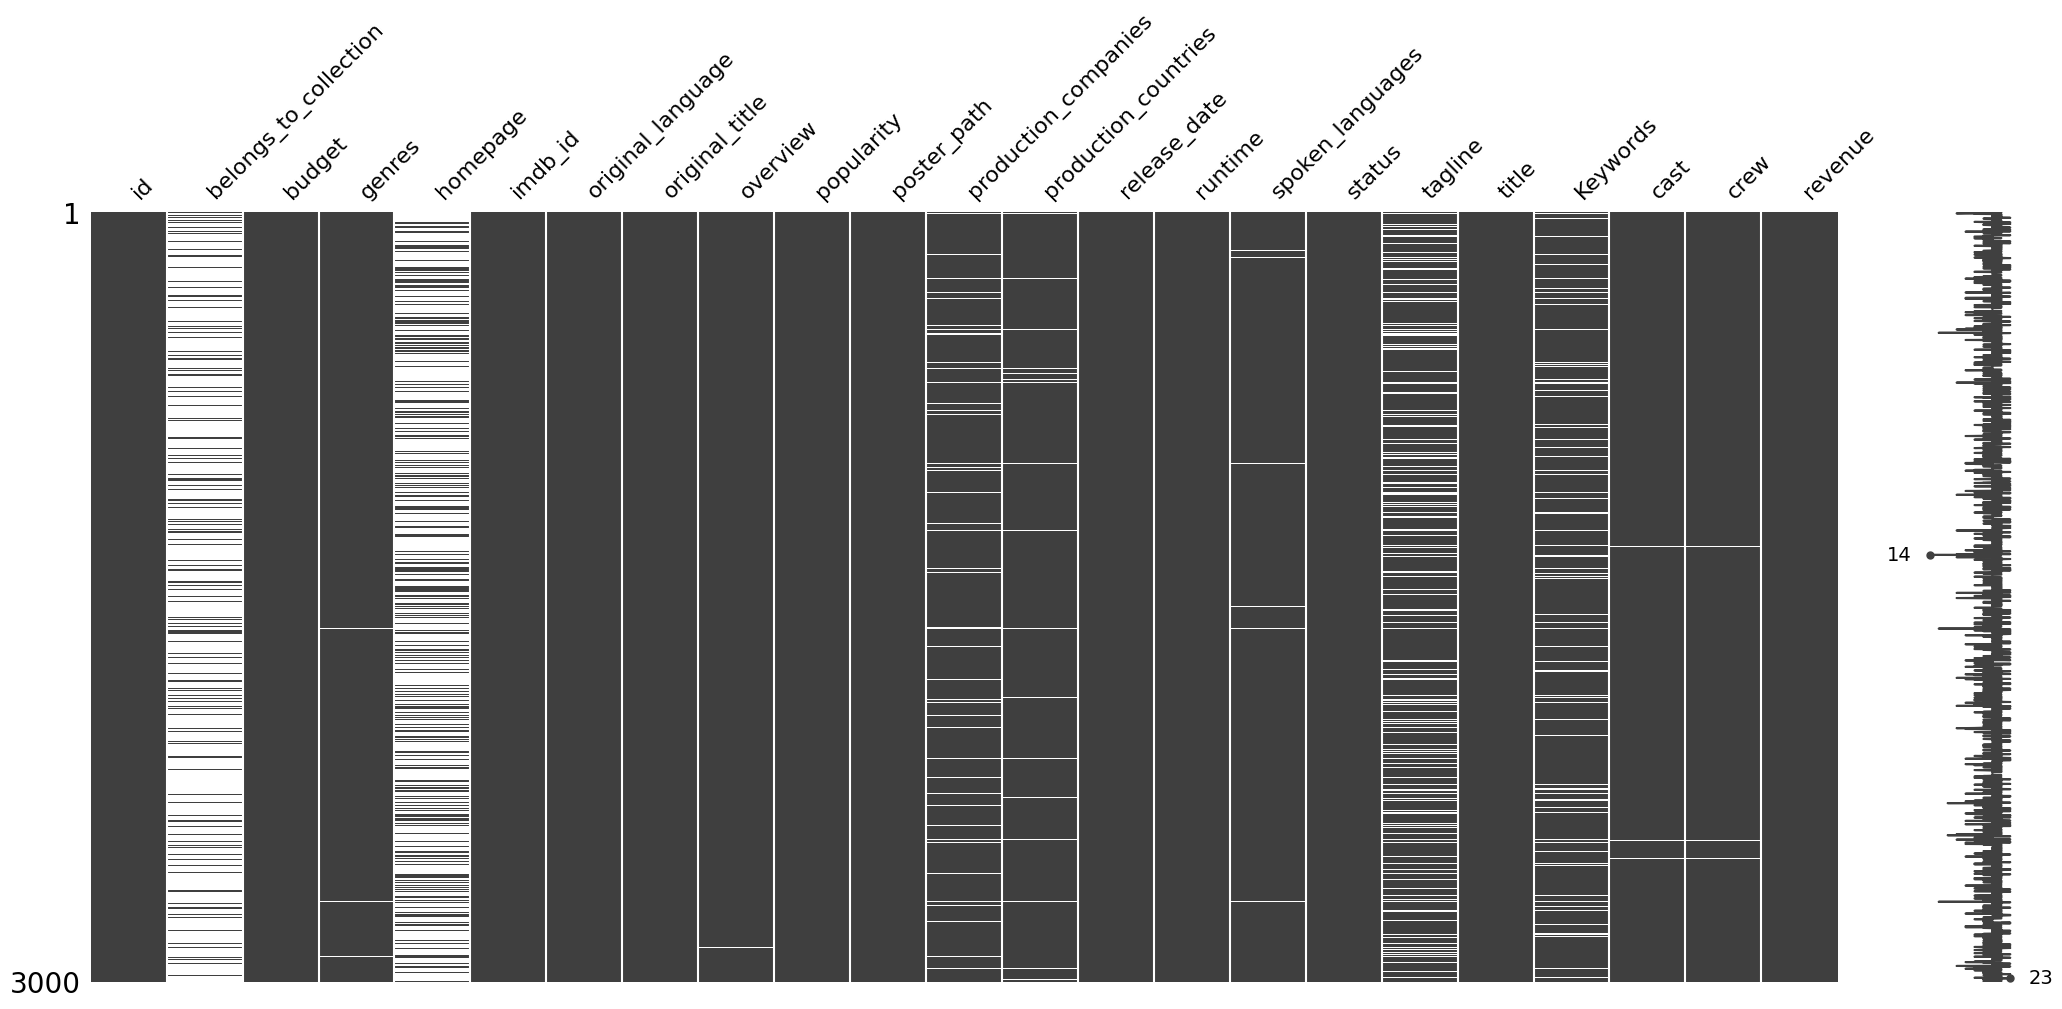

In [77]:
mno.matrix(df_train, (20,6))

By analyzing the mno "missing number" matrix, we can see we need to do something about these incomplete features.

* belongs_to_collection
* homepage
* overview
* genres
* poster_path
* production_companies
* production_countries
* runtime
* spoken_languages
* tagline
* Keywords
* cast
* crew

We have a few options:

1. Discard the feature. We should only do this if we believe the data isn't correlated.
2. Impute on the dataset.  We could use IterativeImputer or SimpleImputer to fill in the blanks.
3. Feature engineering.  We can extract boolean facts, eg "has_homepage" and replace this new feature with the current "homepage" feature. This only makes sense for certain features we can turn into classifications.  Eg, the presence of a homepage or tagline may have some influence on the target. 

In [78]:
# How else do we tell if the data is correlated

### Categorical Features

#### Overview

Here we look at categorical columns in a pie chart to understand the spread of the dataset

In [79]:
categorical_cols_train= df_train.select_dtypes(include=['object'])
categorical_cols_test= df_test.select_dtypes(include=['object'])
print(f'The train dataset contains {len(categorical_cols_train.columns.tolist())} categorical columns')
for cols in categorical_cols_train.columns:
    print(cols,':', len(categorical_cols_train[cols].unique()),'labels')

print(f'The test dataset contains {len(categorical_cols_test.columns.tolist())} categorical columns')
for cols in categorical_cols_test.columns:
    print(cols,':', len(categorical_cols_test[cols].unique()),'labels')

categorical_cols_train.describe()

The train dataset contains 17 categorical columns
belongs_to_collection : 423 labels
genres : 873 labels
homepage : 942 labels
imdb_id : 3000 labels
original_language : 36 labels
original_title : 2975 labels
overview : 2993 labels
poster_path : 3000 labels
production_companies : 2384 labels
production_countries : 322 labels
spoken_languages : 402 labels
status : 2 labels
tagline : 2401 labels
title : 2969 labels
Keywords : 2649 labels
cast : 2976 labels
crew : 2985 labels
The test dataset contains 17 categorical columns
belongs_to_collection : 557 labels
genres : 1102 labels
homepage : 1403 labels
imdb_id : 4398 labels
original_language : 39 labels
original_title : 4353 labels
overview : 4384 labels
poster_path : 4398 labels
production_companies : 3367 labels
production_countries : 459 labels
spoken_languages : 527 labels
status : 4 labels
tagline : 3530 labels
title : 4343 labels
Keywords : 3886 labels
cast : 4366 labels
crew : 4377 labels


,belongs_to_collection,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,spoken_languages,status,tagline,title,Keywords,cast,crew
count,604,2993,946,3000,3000,3000,2992,2999,2844,2945,2980,3000,2403,3000,2724,2987,2984
unique,422,872,941,3000,36,2975,2992,2999,2383,321,401,2,2400,2969,2648,2975,2984
top,"[{'id': 645, 'name': 'James Bond Collection', ...","[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt2637294,en,Joshua,"When Lou, who has become the ""father of the In...",/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,The Magnificent Seven,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
freq,16,266,4,1,2575,2,1,1,51,1752,1817,2996,3,2,27,13,1


The features with > 50 labels are very unique, perhaps we can use specifics about them later in our analysis for correlation.  Perhaps a movie with Danny DeVito has more revenue than one with unheard of actors?

It looks like original_language and status are small enough that we could try to see if their values correlated with revenues.

We'll need an approach to bring some order to the categorical values before trying to model the problem.

In [80]:
print("Scalar features")
for col in df_all.columns:
    if col not in categorical_cols_train:
        print(col)

Scalar features
has_homepage
popularity_crew
popularity_cast
index
id
budget
popularity
release_date
runtime
revenue
cast_json
crew_json


#### Status Feature

In [81]:
# Checking status' values
df_all['status'].unique()



array(['Released', 'Rumored', 'Post Production', nan], dtype=object)

In [82]:
import plotly.graph_objects as go

night_colors = ['#D3DBDD',  'navy',  '#57A7F3']
labels = [x for x in df_train.status.value_counts().index]
values = df_train.status.value_counts()

# Use `hole` to create a donut-like pie chart
fig=go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3,pull=[0,0,0.06,0])])

fig.update_layout(
    title_text="Training Set - Movie Status")
fig.update_traces(marker=dict(colors=night_colors))
fig.show()

In [83]:

night_colors = ['#D3DBDD',  'navy',  '#57A7F3']
labels = [x for x in df_test.status.value_counts().index]
values = df_test.status.value_counts()

# Use `hole` to create a donut-like pie chart
fig=go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3,pull=[0,0,0.06,0])])

fig.update_layout(
    title_text="Test Set - Movie Status")
fig.update_traces(marker=dict(colors=night_colors))
fig.show()

Here's a consideration - is Released & Post Production related?

# Feature Engineering

### Collection Sequence Feature

We're going to engineer a feature named "collection_iteration_seq" that represents which position in a series a movie is. Eg, the 3rd movie in the Dark Knight series will have a value "3", where the first movie will have a value "1"

We'll engineer another feature called "single" that will be boolean 0/1, if the movie is a singleton or not.

We'll use `df_all` to make sure this feature is complete.

After we create the feature on `df_all`, `df_train` and `df_test` will be RECREATED with the new feature.  They'll be split based on having or not having the `revenue` feature.

Set 5917 singles
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   has_homepage              7398 non-null   int64         
 1   popularity_crew           7398 non-null   float64       
 2   single                    7398 non-null   int64         
 3   collection_iteration_seq  7398 non-null   int64         
 4   popularity_cast           7398 non-null   float64       
 5   index                     7398 non-null   int64         
 6   id                        7398 non-null   int64         
 7   belongs_to_collection     1481 non-null   object        
 8   budget                    7398 non-null   int64         
 9   genres                    7375 non-null   object        
 10  homepage                  2366 non-null   object        
 11  imdb_id                   7398 non-null   object        
 12  ori

<AxesSubplot: >

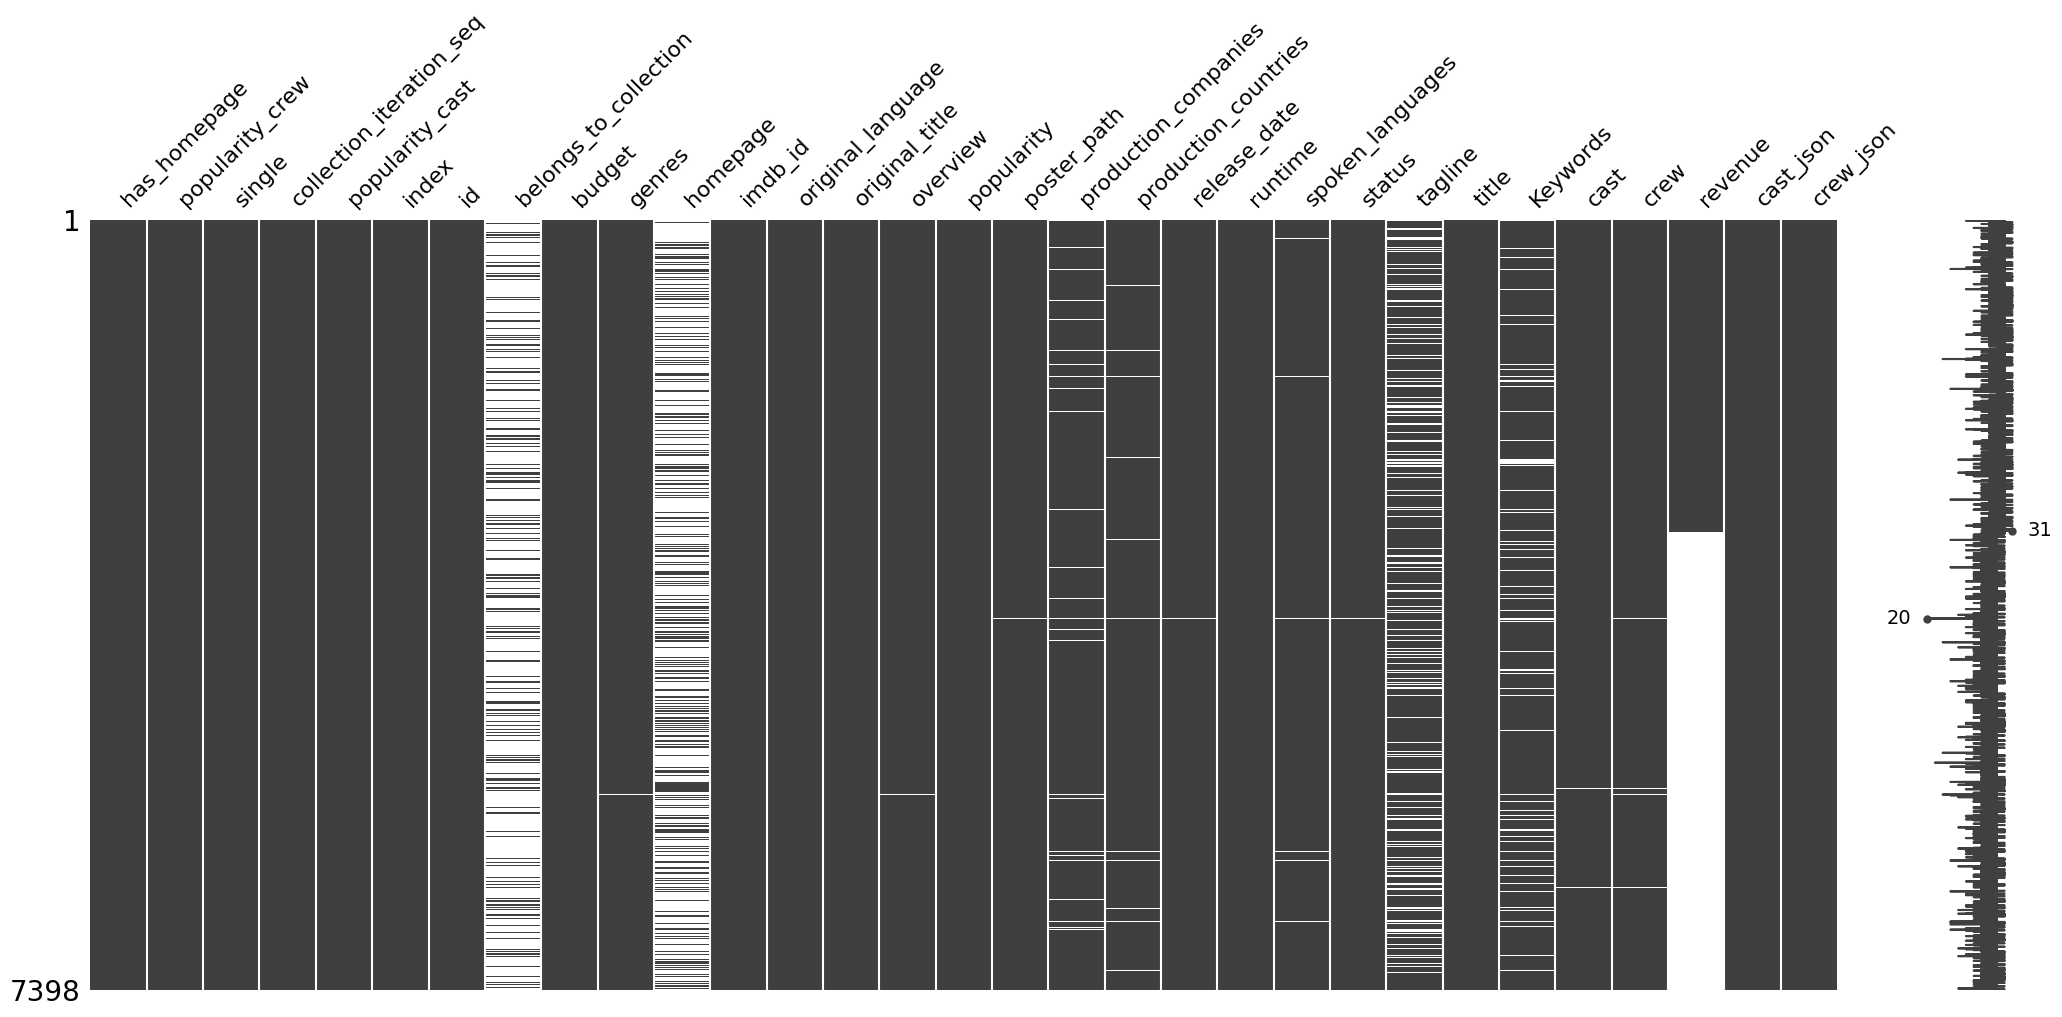

In [84]:
# Collection Iteration Feature

created_collection_iteration = False

# First we can iterate over the rows and determine who doesn't belong to a collection.
# They'll be the first movies in their Series, for now

totalSingle = 0
for k, v in df_all.iterrows():
    collect = v['belongs_to_collection']
    if pd.isna(collect):
      #print("pd.isna(collect): " + str(collect))
      if not created_collection_iteration:
        try:
          df_all.insert(k, "collection_iteration_seq", 0)
          df_all.insert(k, "single", 0)
          created_collection_iteration = True
          df_all.at[k, 'collection_iteration_seq'] = 1
          df_all.at[k, 'single'] = 1
        except:
          df_all.at[k, 'collection_iteration_seq'] = 1
          df_all.at[k, 'single'] = 1
      else:
        df_all.at[k, 'collection_iteration_seq'] = 1
        df_all.at[k, 'single'] = 1

      totalSingle+=1

print("Set " + str(totalSingle) + " singles")
df_all.info()
mno.matrix(df_all, (10,5))

In [85]:
df_all['collection_iteration_seq'].unique()

array([0, 1], dtype=int64)

In [86]:
# Identifying "Single movies"

collection_ids = []
created_collection_id = False

moviesInSeries = 0
# Iterate all the rows again, and safely read the JSON string in belongs_to_collection
all = df_all.to_dict('index')

for k in all:
  v = all[k]
  safe = str(v['belongs_to_collection'])
  safe = safe.replace("n' ", 'n')
  safe = safe.replace("'", '"')
  safe = safe.replace("\"s ", "'s")
  safe = safe.replace("None", 'null')
  safe = safe.replace("N\"E", "N'E")
  safe = safe.replace("We\"re", "We're")
  safe = safe.replace("L\"a", "L'a")
  if safe != "nan": # Only get entries with a belongs_to_collection
    parsed = json.loads(safe)
    collection_id = parsed[0]['id']
    collection_ids.append(collection_id)
    # We show here there are only 0 or 1 collection entries on a movie object.
    if (len(parsed) > 1):
      print(parsed)

    if not created_collection_id:
      try:
        df_all.insert(k, "collection_id", 0)
        df_all.at[k, 'collection_id'] = collection_id
        df_all.at[k, 'single'] = 0
        created_collection_id = True
      except:
        df_all.at[k, 'collection_id'] = collection_id
        df_all.at[k, 'single'] = 0
    else:
      df_all.at[k, 'collection_id'] = collection_id
      df_all.at[k, 'single'] = 0


In [87]:
df_all['collection_iteration_seq'].unique()

array([0, 1], dtype=int64)

Marked collection_iteration_seq on 0


<AxesSubplot: >

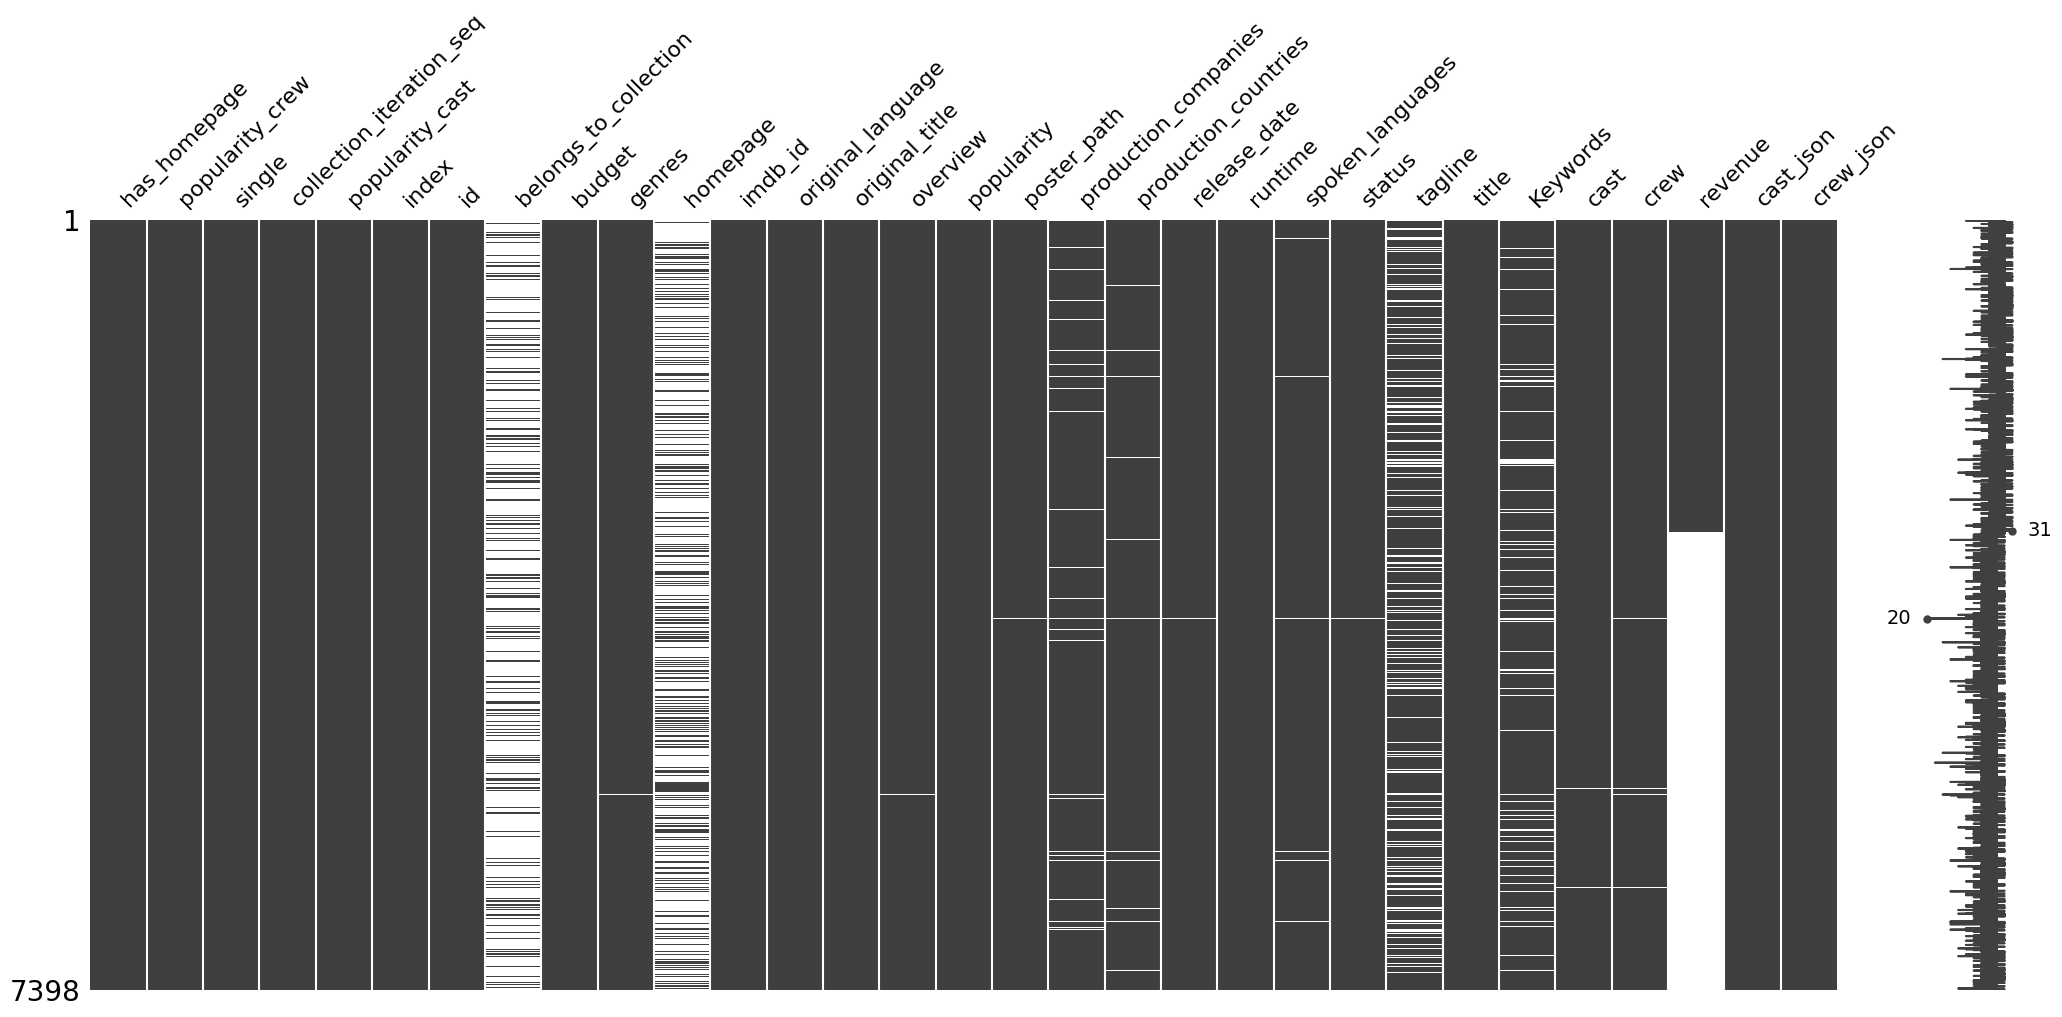

In [88]:
# Identifying series position for movies

# Silence Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None
moviesInSeries = 0
for cid in collection_ids:
    movies = df_all.loc[df_all['collection_id'] == cid]
    # SettingWithCopyWarning thrown here but it's ok, we know we're doing this on a copy
    # We don't need the copy after we set the counter in the next loop.
    movies.sort_values(by='release_date', inplace=True)
    
    counter = 1
    # Apply the value to collection_iteration_seq
    for k, v in movies.iterrows():
      df_all.at[k, 'collection_iteration_seq'] = counter
      counter += 1    
      moviesInSeries += 1

print("Marked collection_iteration_seq on " + str(moviesInSeries))

# Put back Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = "warn"
mno.matrix(df_all, (10,5))

In [89]:
df_all['collection_iteration_seq'].unique()

array([0, 1], dtype=int64)

In [90]:
# now drop collection_id and belongs_to_collection

df_all.drop(labels=['belongs_to_collection'], axis=1, inplace=True)

In [91]:
# Now create df_train and df_test again
df_train,df_test = split_from_all(df_all)

<AxesSubplot: >

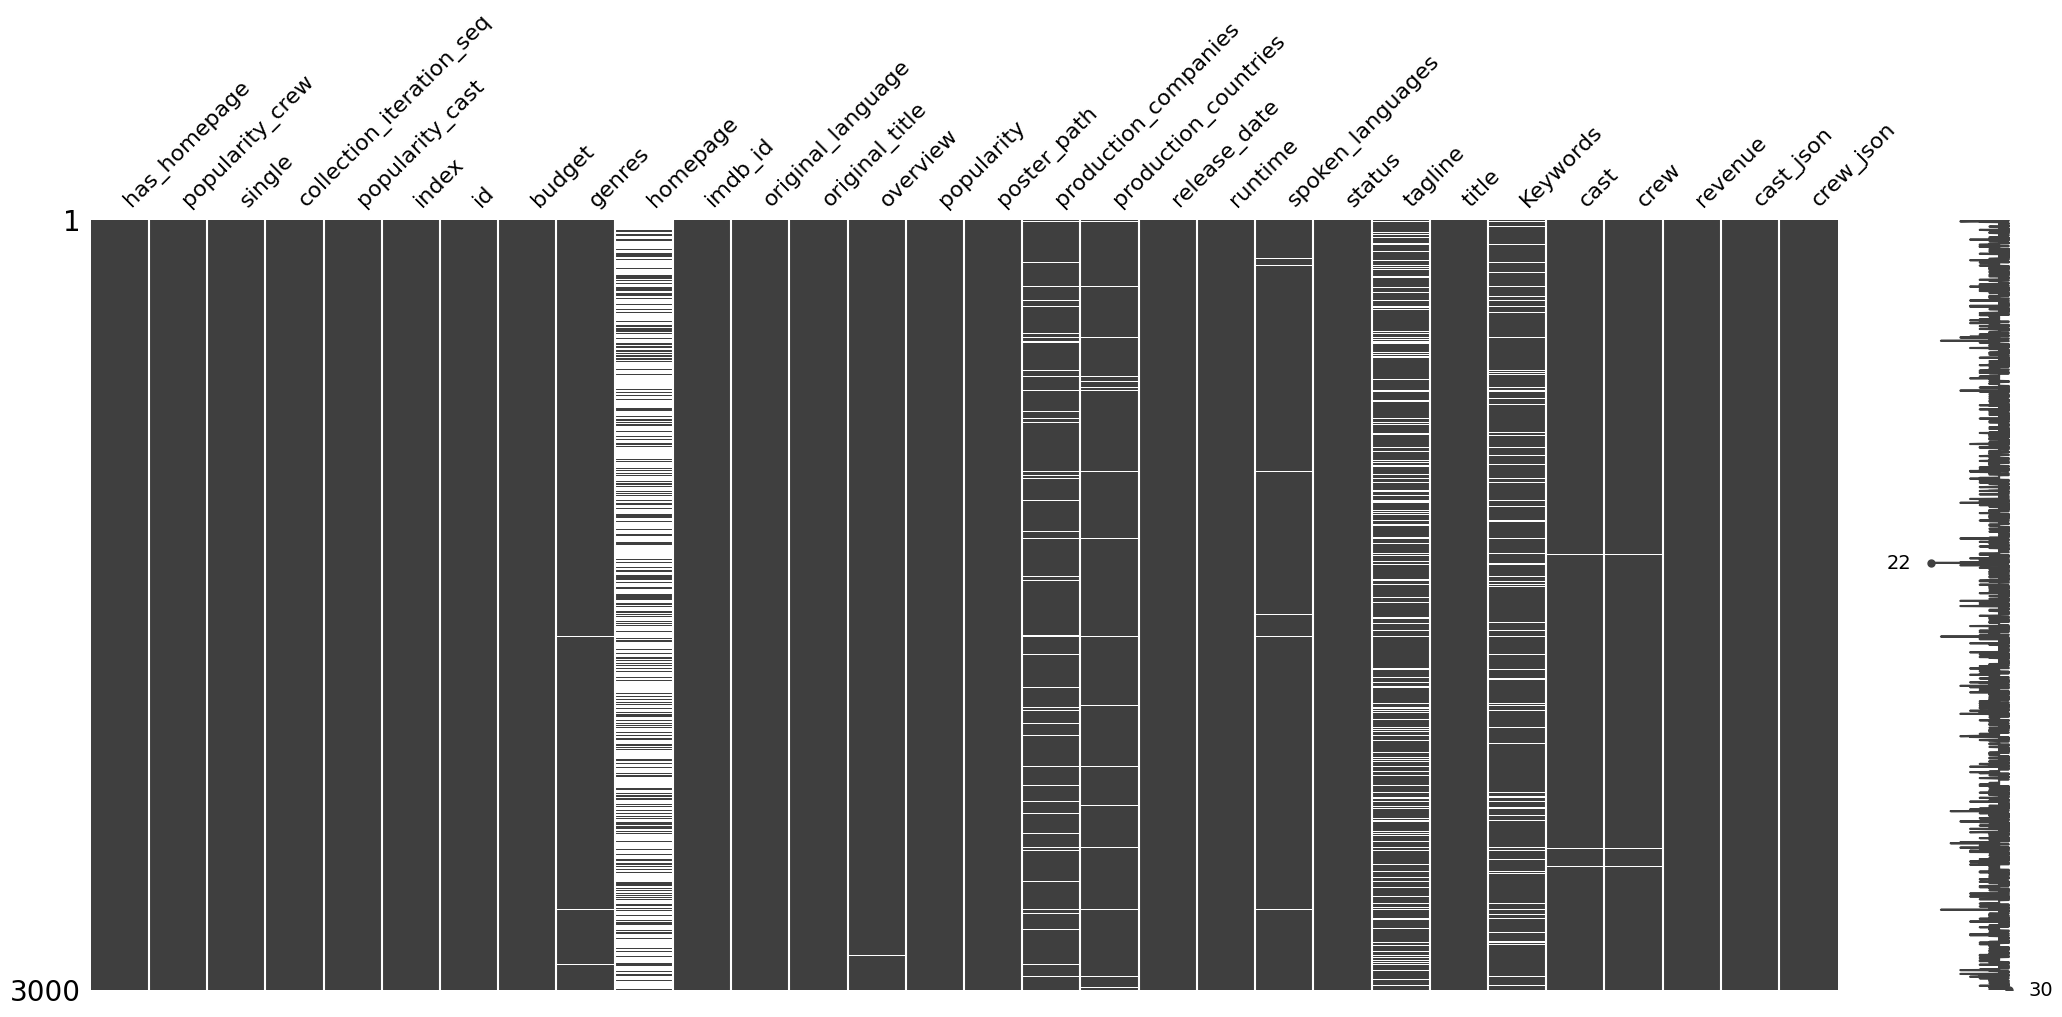

In [92]:
mno.matrix(df_train, (10,5))

In [93]:
df_train['single'].unique()

array([0, 1], dtype=int64)

In [94]:
df_train['collection_iteration_seq'].unique()

array([0, 1], dtype=int64)

In [95]:
df_train.describe()

,has_homepage,popularity_crew,single,collection_iteration_seq,popularity_cast,index,id,budget,popularity,runtime,revenue
count,3000.0,3000.0,3000.000000,3000.000000,3000.0,3000.000000,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,0.0,0.0,0.798667,0.798667,0.0,1499.500000,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,0.0,0.0,0.401063,0.401063,0.0,866.169729,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,0.0,0.0,1.000000,1.000000,0.0,749.750000,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,0.0,0.0,1.000000,1.000000,0.0,1499.500000,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,0.0,0.0,1.000000,1.000000,0.0,2249.250000,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,0.0,0.0,1.000000,1.000000,0.0,2999.000000,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [96]:
# Reduce fragmenting of DataFrame
df_all = df_all.copy()

### Cast Popularity Feature

We're going to build a dataset called `df_cast` that has two features
`name` as a key
`rating` as a popularity rating

Once we have this dataset, we can add a feature called `popularity_cast`, which is a weighted sum/average of the cast's popularity ratings, on the `df_all` set.

Afterwards, we should be able to drop the cast feature.


In [97]:
# Here we build a list of all actors

actors=[]
all = df_all.to_dict('index')
for k in all:
  v = all[k]
  cast_str = v['cast']
  if str(cast_str) == "nan":
    continue
  cast_json, safe = to_json(cast_str)
  df_all.at[k,'cast_json'] = safe
  for actor in cast_json:
    #print(actor['name'])
    actors.append(actor['name'])
df_all.drop(['cast'], axis=1)
df_all = df_all.copy()

# Now we remove duplicates and create a dataframe to contain our actors

actors=list(set(actors))
actors_dict=[]
for actor in actors:
    actors_dict.append({'name':actor,'rating':0,'movies':0})

df_cast = pd.DataFrame(actors_dict)
df_cast.drop_duplicates(subset=['name'], keep='first')
# This speeds us up from 5 frames per second to thousands of frames per second, CPU Only.
df_cast.set_index(['name'],inplace=True)
df_cast.info()
df_cast.index.name

<class 'pandas.core.frame.DataFrame'>
Index: 75944 entries, Michelle Winters to Elda Maida
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   rating  75944 non-null  int64
 1   movies  75944 non-null  int64
dtypes: int64(2)
memory usage: 1.7+ MB


'name'

Wow!  We have 76k unique actors!  This should give us some good insight!

We're going to make a "rating" for each actor, then use these "rating"s to extract a "cast_rating" feature for the films.

We'll sum the popularity each film has, on each actor's record.  We'll also keep track of how many films an actor has been in.

This lets us average the score of an actor based on the movies they've participated in.

In [98]:
%%time
# This part computes the sum of movies & ratings in the df_cast dataframe
#dict_cast = df_cast.to_dict('records')
all = df_all.to_dict('index')

idxs = df_all.index.values
for k in tqdm(idxs,desc="Computing sums",unit="Film"):
    #print("k: " + str(k))
    v = all[k]
    cast_json = v['cast_json']
    popularity = v['popularity']
    #print(cast_json)
    #print(popularity)
    if str(cast_json) == "nan" or str(cast_json) == "":
      #print("bail")
      continue
    actors = json.loads(cast_json)
    #print(type(actors))
    for actor in actors:
      #print(actor)
      idx = actor['name']
      df_cast.at[idx, 'rating'] += popularity
      df_cast.at[idx, 'movies'] += 1


#print(df_cast[0
df_cast.info()
df_cast.describe()


Computing sums: 100%|██████████| 7398/7398 [00:23<00:00, 316.86Film/s]

<class 'pandas.core.frame.DataFrame'>
Index: 75944 entries, Michelle Winters to Elda Maida
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  75944 non-null  float64
 1   movies  75944 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 3.8+ MB
CPU times: total: 23.1 s
Wall time: 23.5 s


,rating,movies
count,75944.000000,75944.000000
mean,22.831559,2.041425
std,44.113928,3.144191
min,0.000001,1.000000
25%,6.610904,1.000000
50%,11.213399,1.000000
75%,20.659284,2.000000
max,1382.041307,80.000000


In [99]:
# Now we compute the average ratings per actor
cast_idxs = df_cast.index.values
cast = df_cast.to_dict('index')
for k in tqdm(cast_idxs,desc="Computing averages",unit="Actor"):
  v = cast[k]
  sum_movies = v['movies']
  sum_rating = v['rating']
  try:
    new_rating = sum_rating / sum_movies 
  except:
    new_rating = 0
  
  df_cast.at[k,'rating'] = new_rating

Computing averages: 100%|██████████| 75944/75944 [00:02<00:00, 27605.68Actor/s]


In [100]:
df_cast.describe()

,rating,movies
count,75944.000000,75944.000000
mean,11.428440,2.041425
std,17.906915,3.144191
min,0.000001,1.000000
25%,5.919511,1.000000
50%,8.840145,1.000000
75%,12.348350,2.000000
max,547.488298,80.000000


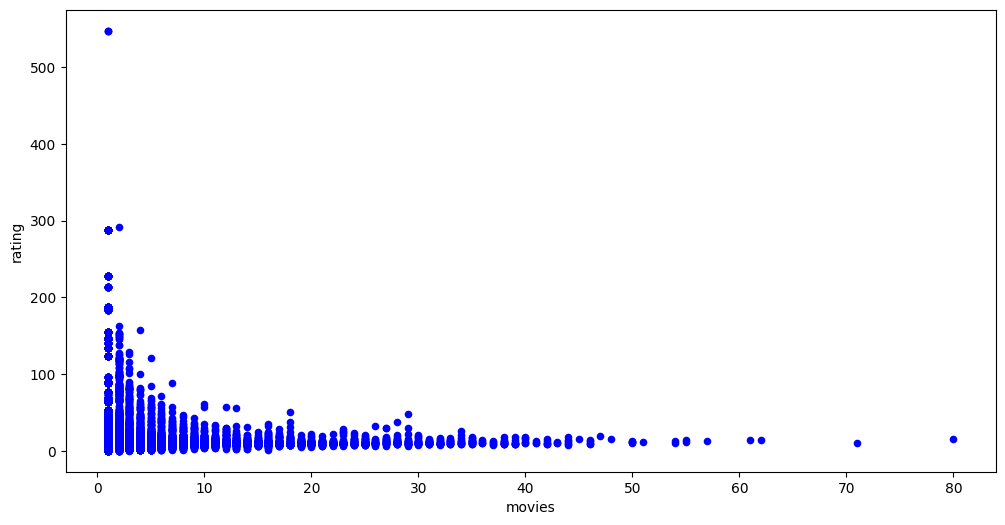

In [101]:
# Let's see what the new feature looks like
ax = plt.gca()

df_cast.plot(kind='scatter',x='movies',y='rating',color='blue',ax=ax)

plt.show()

So this plot shows us that actors with more movies typically have a lower rating.

Now we're going to iterate all the films once more, and engineer this `popularity_cast` rating 

In [102]:
for idx in tqdm(idxs,desc="Comptuing film popularity_cast",unit="Film"):
    film = all[idx]
    popularity_cast = 0
    count = 0
    cast_json = df_all.at[idx,'cast_json']
    if cast_json == "":
        continue
    try:
        actors = json.loads(cast_json)
        if len(actors) > 0:
            for actor in actors:
                popularity_cast += df_cast.at[actor['name'],'rating']
                count+=1
    except Exception as e:
        print("Failed for film")
        print(film)
        print(e)
        
    try:
        rating = popularity_cast / count
    except:
        rating = 0
    
    if (rating > 100):
        print(film['original_title'] + " " + str(rating))
    
    df_all.at[idx,'popularity_cast'] = rating

df_all[df_all['original_title'] == 'Minions']['popularity_cast']

Comptuing film popularity_cast:  16%|█▌        | 1193/7398 [00:00<00:01, 4069.57Film/s]

Beauty and the Beast 241.75602495987312
Gone Girl 101.71609885665251


Comptuing film popularity_cast:  35%|███▌      | 2598/7398 [00:00<00:01, 4513.16Film/s]

Baby Driver 140.2126757631746
Deadpool 132.6092999553883


Comptuing film popularity_cast:  73%|███████▎  | 5400/7398 [00:01<00:00, 4554.30Film/s]

Captain America: Civil War 101.75327311661678


Comptuing film popularity_cast:  92%|█████████▏| 6824/7398 [00:01<00:00, 4688.93Film/s]

Big Hero 6 102.14642249009805
Avatar 129.03897688242083
Minions 159.59109833839773


Comptuing film popularity_cast: 100%|██████████| 7398/7398 [00:01<00:00, 4504.28Film/s]


6380    159.591098
Name: popularity_cast, dtype: float64

In [103]:
df_all.describe()

,has_homepage,popularity_crew,single,collection_iteration_seq,popularity_cast,index,id,budget,popularity,runtime,revenue
count,7398.0,7398.0,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7.398000e+03,7398.000000,7392.000000,3.000000e+03
mean,0.0,0.0,0.799811,0.799811,9.304677,1915.045012,3699.500000,2.260146e+07,8.514968,107.717262,6.672585e+07
std,0.0,0.0,0.400169,0.400169,6.673027,1174.879486,2135.762978,3.694867e+07,12.165794,21.480040,1.375323e+08
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,0.0,0.0,1.000000,1.000000,6.933352,924.250000,1850.250000,0.000000e+00,3.933124,94.000000,2.379808e+06
50%,0.0,0.0,1.000000,1.000000,9.148701,1849.000000,3699.500000,7.500000e+06,7.435844,104.000000,1.680707e+07
75%,0.0,0.0,1.000000,1.000000,11.094371,2773.750000,5548.750000,2.800000e+07,10.920002,118.000000,6.891920e+07
max,0.0,0.0,1.000000,1.000000,241.756025,4397.000000,7398.000000,3.800000e+08,547.488298,338.000000,1.519558e+09


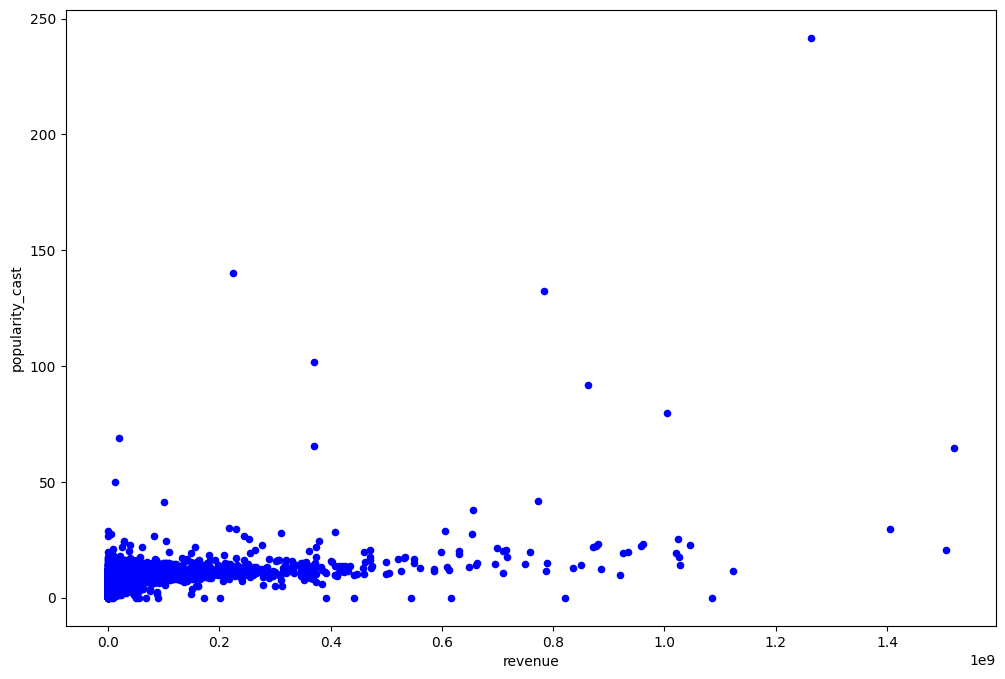

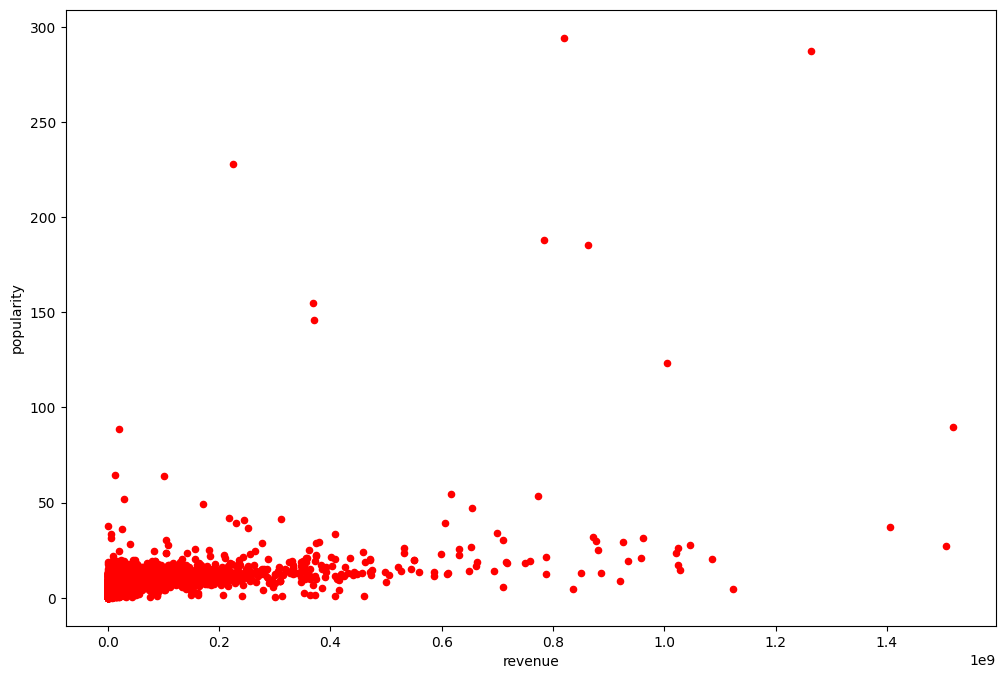

In [104]:
# Let's see what it looks like
ax = plt.gca()

df_all.plot(kind='scatter',x='revenue',y='popularity_cast',color='blue',ax=ax, figsize=(12,8))

plt.show()

ax = plt.gca()

df_all.plot(kind='scatter',x='revenue',y='popularity',color='red',ax=ax, figsize=(12,8))

plt.show()

Nice, this looks like a natural feature now - it's distribution looks similar to that of popularity.

### Crew Popularity Feature

We're going to build a dataset called `df_crew` that has two features
`name` as a key
`rating` as a popularity rating

Once we have this dataset, we can add a feature called "popularity_crew" to the movies data sets which is a weighted sum/average of the cast's popularity ratings.

Afterwards, we should be able to drop the crew feature.

This should pretty much mirror what happened in the cast popularity feature

In [105]:
# Here we build a list of all cast members

crews=[]
all = df_all.to_dict('index')
for k in all:
  v = all[k]
  crew_str = v['crew']
  if str(crew_str) == "nan":
    continue
  crew_json, safe = to_json(crew_str)
  df_all.at[k,'crew_json'] = safe
  for crew in crew_json:
    crews.append(crew['name'])
df_all.drop(['crew'], axis=1)
df_all = df_all.copy()

# Now we remove duplicates and create a dataframe to contain our actors

crews=list(set(crews))
crews_dict=[]
for crew in crews:
    crews_dict.append({'name':crew,'rating':0,'movies':0})

df_crew = pd.DataFrame(crews_dict)
df_crew.drop_duplicates(subset=['name'], keep='first')
# This speeds us up from 5 frames per second to thousands of frames per second, CPU Only.
df_crew.set_index(['name'],inplace=True)
df_crew.info()
df_crew.index.name

<class 'pandas.core.frame.DataFrame'>
Index: 68763 entries, Owen Patry to Tony Whitman
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   rating  68763 non-null  int64
 1   movies  68763 non-null  int64
dtypes: int64(2)
memory usage: 1.6+ MB


'name'

In [106]:
%%time
# This part computes the sum of movies & ratings in the df_crew dataframe
all = df_all.to_dict('index')

idxs = df_all.index.values
for k in tqdm(idxs,desc="Computing sums",unit="Film"):
    v = all[k]
    crew_json = v['crew_json']
    popularity = v['popularity']
    if str(crew_json) == "nan" or str(crew_json) == "":
      continue
    crews = json.loads(crew_json)
    for crew in crews:
      idx = crew['name']
      df_crew.at[idx, 'rating'] += popularity
      df_crew.at[idx, 'movies'] += 1

df_crew.info()
df_crew.describe()


Computing sums: 100%|██████████| 7398/7398 [00:36<00:00, 204.83Film/s]

<class 'pandas.core.frame.DataFrame'>
Index: 68763 entries, Owen Patry to Tony Whitman
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  68763 non-null  float64
 1   movies  68763 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 3.6+ MB
CPU times: total: 35.9 s
Wall time: 36.3 s


,rating,movies
count,68763.000000,68763.000000
mean,33.243484,2.611724
std,62.217374,3.907679
min,0.000001,1.000000
25%,8.062578,1.000000
50%,14.048694,1.000000
75%,31.277192,3.000000
max,1610.790375,105.000000


In [107]:
# Now we compute the average ratings per crew member
crew_idxs = df_crew.index.values
crew = df_crew.to_dict('index')
for k in tqdm(crew_idxs,desc="Computing averages",unit="Actor"):
  v = crew[k]
  sum_movies = v['movies']
  sum_rating = v['rating']
  try:
    new_rating = sum_rating / sum_movies 
  except:
    new_rating = 0
  
  df_crew.at[k,'rating'] = new_rating
    
df_crew.describe()


Computing averages: 100%|██████████| 68763/68763 [00:03<00:00, 20374.69Actor/s]


,rating,movies
count,68763.000000,68763.000000
mean,12.374511,2.611724
std,16.655186,3.907679
min,0.000001,1.000000
25%,6.868022,1.000000
50%,9.901276,1.000000
75%,13.412137,3.000000
max,287.253654,105.000000


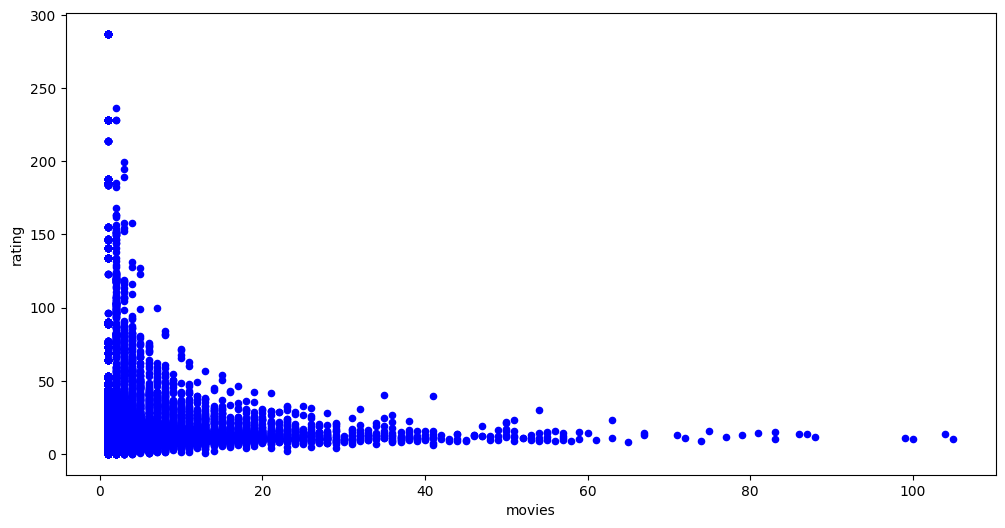

In [108]:
ax = plt.gca()

df_crew.plot(kind='scatter',x='movies',y='rating',color='blue',ax=ax)

plt.show()

In [109]:
for idx in tqdm(idxs,desc="Comptuing film popularity_crew",unit="Film"):
    film = all[idx]
    popularity_crew = 0
    count = 0
    crew_json = df_all.at[idx,'crew_json']
    if crew_json == "":
        continue
    try:
        crews = json.loads(crew_json)
        if len(crews) > 0:
            for crew in crews:
                popularity_crew += df_crew.at[crew['name'],'rating']
                count+=1
    except Exception as e:
        print("Failed for film")
        print(film)
        print(e)
        
    try:
        rating = popularity_crew / count
    except:
        rating = 0
    
    if (rating > 100):
        print(film['original_title'] + " " + str(rating))
    
    df_all.at[idx,'popularity_crew'] = rating

df_all[df_all['original_title'] == 'Minions']['popularity_crew']

Comptuing film popularity_crew:  13%|█▎        | 941/7398 [00:00<00:03, 1789.22Film/s]

Beauty and the Beast 157.6309831171297


Comptuing film popularity_crew:  27%|██▋       | 1996/7398 [00:01<00:02, 2025.60Film/s]

Baby Driver 168.56119415839768


Comptuing film popularity_crew: 100%|██████████| 7398/7398 [00:02<00:00, 3250.47Film/s]


6380    95.790258
Name: popularity_crew, dtype: float64

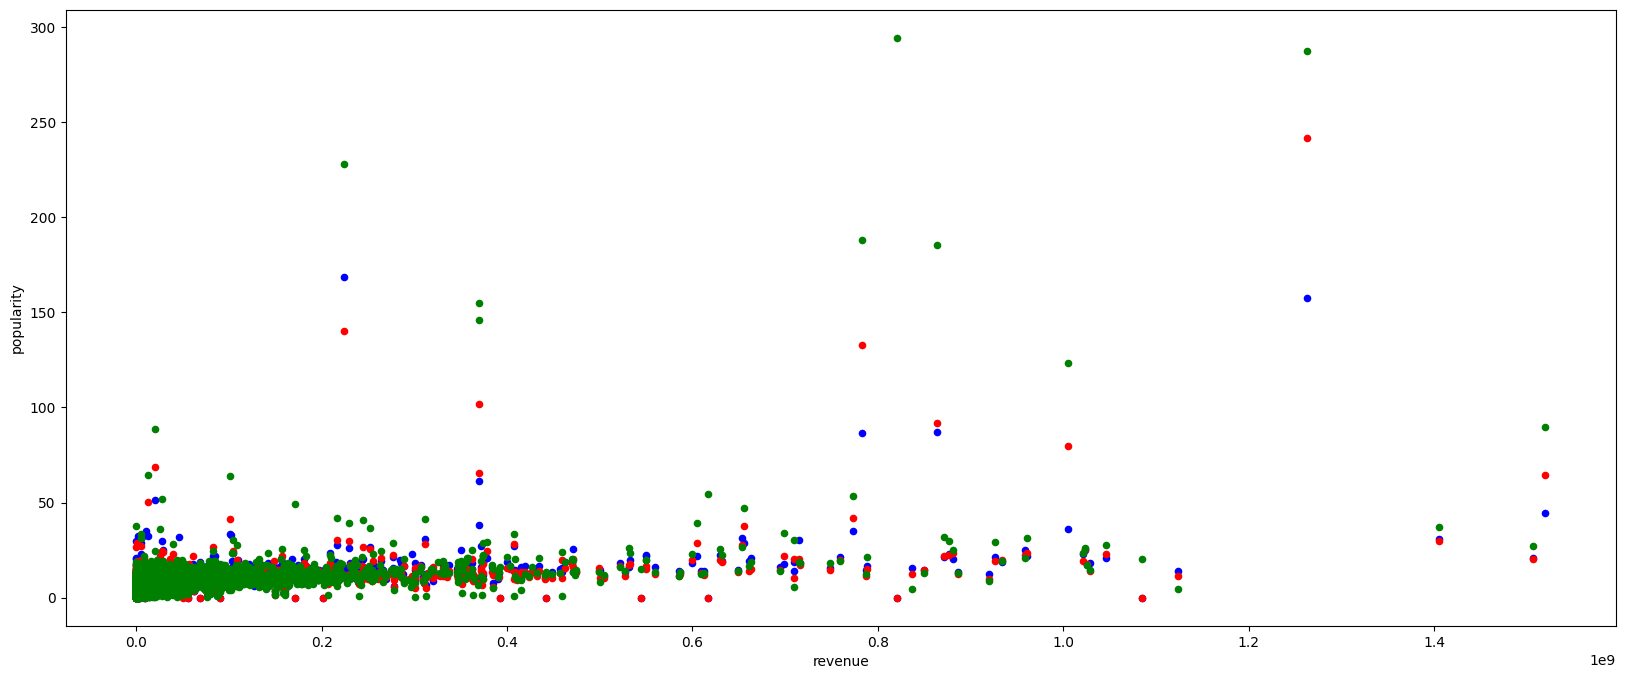

In [110]:
# Let's see what it looks like
ax = plt.gca()

df_all.plot(kind='scatter',x='revenue',y='popularity_crew',color='blue',ax=ax, figsize=(20,8))
df_all.plot(kind='scatter',x='revenue',y='popularity_cast',color='red',ax=ax, figsize=(20,8))
df_all.plot(kind='scatter',x='revenue',y='popularity',color='green',ax=ax, figsize=(20,8))

plt.show()

### Keywords Feature

We should be able to extract keyword_rating feature like we do for Cast & Crew

### Homepage Feature

We can easily set a boolean for "has_homepage" and replace "homepage" feature with this

In [111]:
data, idxs = quickIt(df_all)
#print(data)
for k in idxs:
    v = data[k]
    if v['homepage'] == "" or str(v['homepage']) == "nan":
      df_all.at[k,'has_homepage'] = 0
    else:
      df_all.at[k,'has_homepage'] = 1  

In [112]:
df_all['has_homepage'].unique()
df_test.info()
df_train, df_test = split_from_all(df_all)
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 3000 to 7397
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   has_homepage              4398 non-null   int64         
 1   popularity_crew           4398 non-null   float64       
 2   single                    4398 non-null   int64         
 3   collection_iteration_seq  4398 non-null   int64         
 4   popularity_cast           4398 non-null   float64       
 5   index                     4398 non-null   int64         
 6   id                        4398 non-null   int64         
 7   budget                    4398 non-null   int64         
 8   genres                    4382 non-null   object        
 9   homepage                  1420 non-null   object        
 10  imdb_id                   4398 non-null   object        
 11  original_language         4398 non-null   object        
 12  original_title   

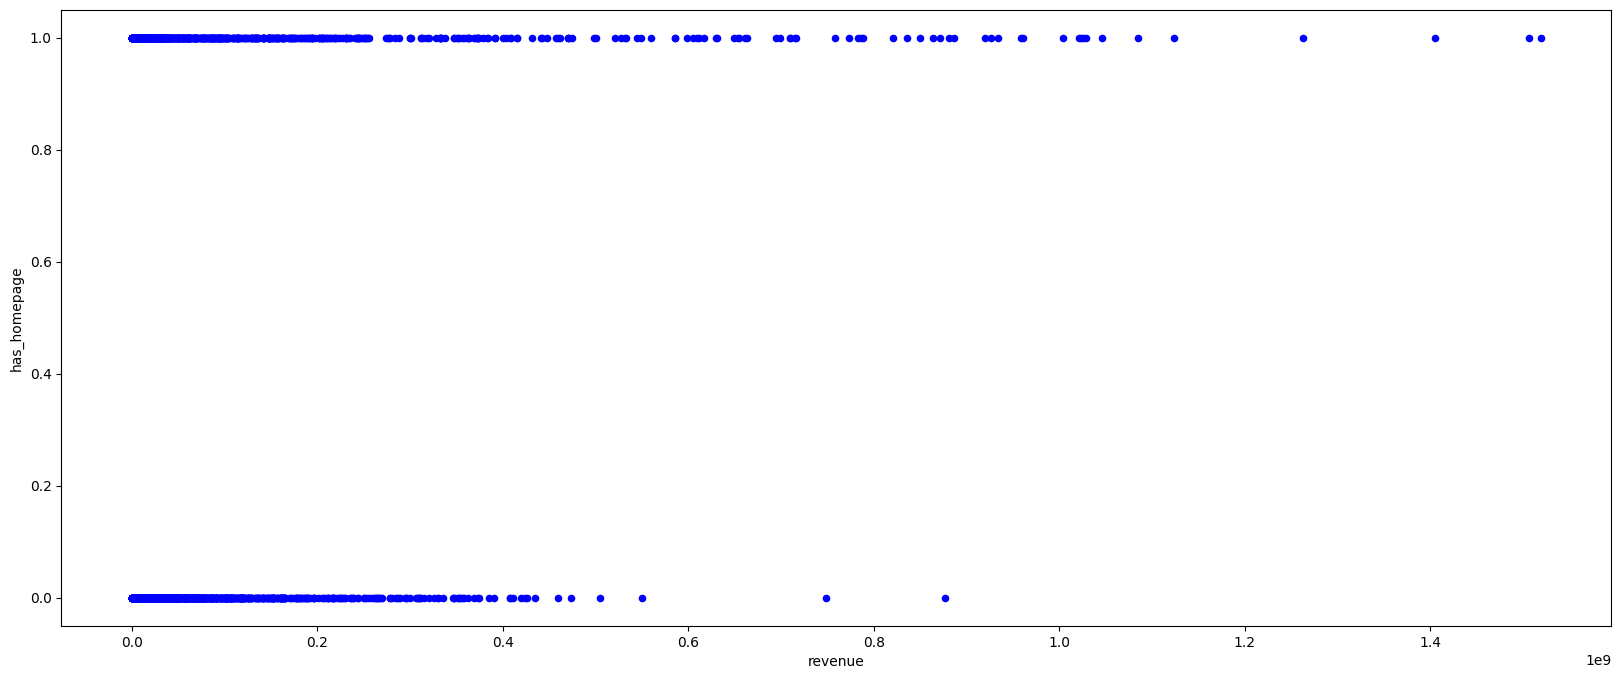

In [113]:
ax = plt.gca()

df_all.plot(kind='scatter',x='revenue',y='has_homepage',color='blue',ax=ax, figsize=(20,8))

plt.show()

In [114]:
df_all.drop(labels=['homepage'], axis=1, inplace=True)


In [115]:
df_all.describe()

,has_homepage,popularity_crew,single,collection_iteration_seq,popularity_cast,index,id,budget,popularity,runtime,revenue
count,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7.398000e+03,7398.000000,7392.000000,3.000000e+03
mean,0.319816,9.323097,0.799811,0.799811,9.304677,1915.045012,3699.500000,2.260146e+07,8.514968,107.717262,6.672585e+07
std,0.466437,6.111660,0.400169,0.400169,6.673027,1174.879486,2135.762978,3.694867e+07,12.165794,21.480040,1.375323e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,0.000000,6.353572,1.000000,1.000000,6.933352,924.250000,1850.250000,0.000000e+00,3.933124,94.000000,2.379808e+06
50%,0.000000,9.242910,1.000000,1.000000,9.148701,1849.000000,3699.500000,7.500000e+06,7.435844,104.000000,1.680707e+07
75%,1.000000,11.651450,1.000000,1.000000,11.094371,2773.750000,5548.750000,2.800000e+07,10.920002,118.000000,6.891920e+07
max,1.000000,168.561194,1.000000,1.000000,241.756025,4397.000000,7398.000000,3.800000e+08,547.488298,338.000000,1.519558e+09


In [116]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   has_homepage              7398 non-null   int64         
 1   popularity_crew           7398 non-null   float64       
 2   single                    7398 non-null   int64         
 3   collection_iteration_seq  7398 non-null   int64         
 4   popularity_cast           7398 non-null   float64       
 5   index                     7398 non-null   int64         
 6   id                        7398 non-null   int64         
 7   budget                    7398 non-null   int64         
 8   genres                    7375 non-null   object        
 9   imdb_id                   7398 non-null   object        
 10  original_language         7398 non-null   object        
 11  original_title            7398 non-null   object        
 12  overview            

### original_language

We can replace `original_language` with a dummy because it's unique count is *low*

In [117]:
len(df_all['original_language'].unique())

44

### spoken_languages

not sure what to do with this one

### Status

I think any movie in post-production should go to 'released' status to be included in the larger dataset.  Do you?


### Drops

Leave this last. We drop everything else we don't need for the model here.

In [118]:
# df_all.drop(["original_title","cast","crew","cast_json","crew_json","title","imdb_id"],axis=1,inplace=True)

# Understanding Test Dataset

In [119]:
### Same as the Training dataset

# Predictions

In [120]:
df_train,df_test = split_from_all(df_all)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   has_homepage              3000 non-null   int64         
 1   popularity_crew           3000 non-null   float64       
 2   single                    3000 non-null   int64         
 3   collection_iteration_seq  3000 non-null   int64         
 4   popularity_cast           3000 non-null   float64       
 5   index                     3000 non-null   int64         
 6   id                        3000 non-null   int64         
 7   budget                    3000 non-null   int64         
 8   genres                    2993 non-null   object        
 9   imdb_id                   3000 non-null   object        
 10  original_language         3000 non-null   object        
 11  original_title            3000 non-null   object        
 12  overview            

In [121]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 3000 to 7397
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   has_homepage              4398 non-null   int64         
 1   popularity_crew           4398 non-null   float64       
 2   single                    4398 non-null   int64         
 3   collection_iteration_seq  4398 non-null   int64         
 4   popularity_cast           4398 non-null   float64       
 5   index                     4398 non-null   int64         
 6   id                        4398 non-null   int64         
 7   budget                    4398 non-null   int64         
 8   genres                    4382 non-null   object        
 9   imdb_id                   4398 non-null   object        
 10  original_language         4398 non-null   object        
 11  original_title            4398 non-null   object        
 12  overview         

<AxesSubplot: >

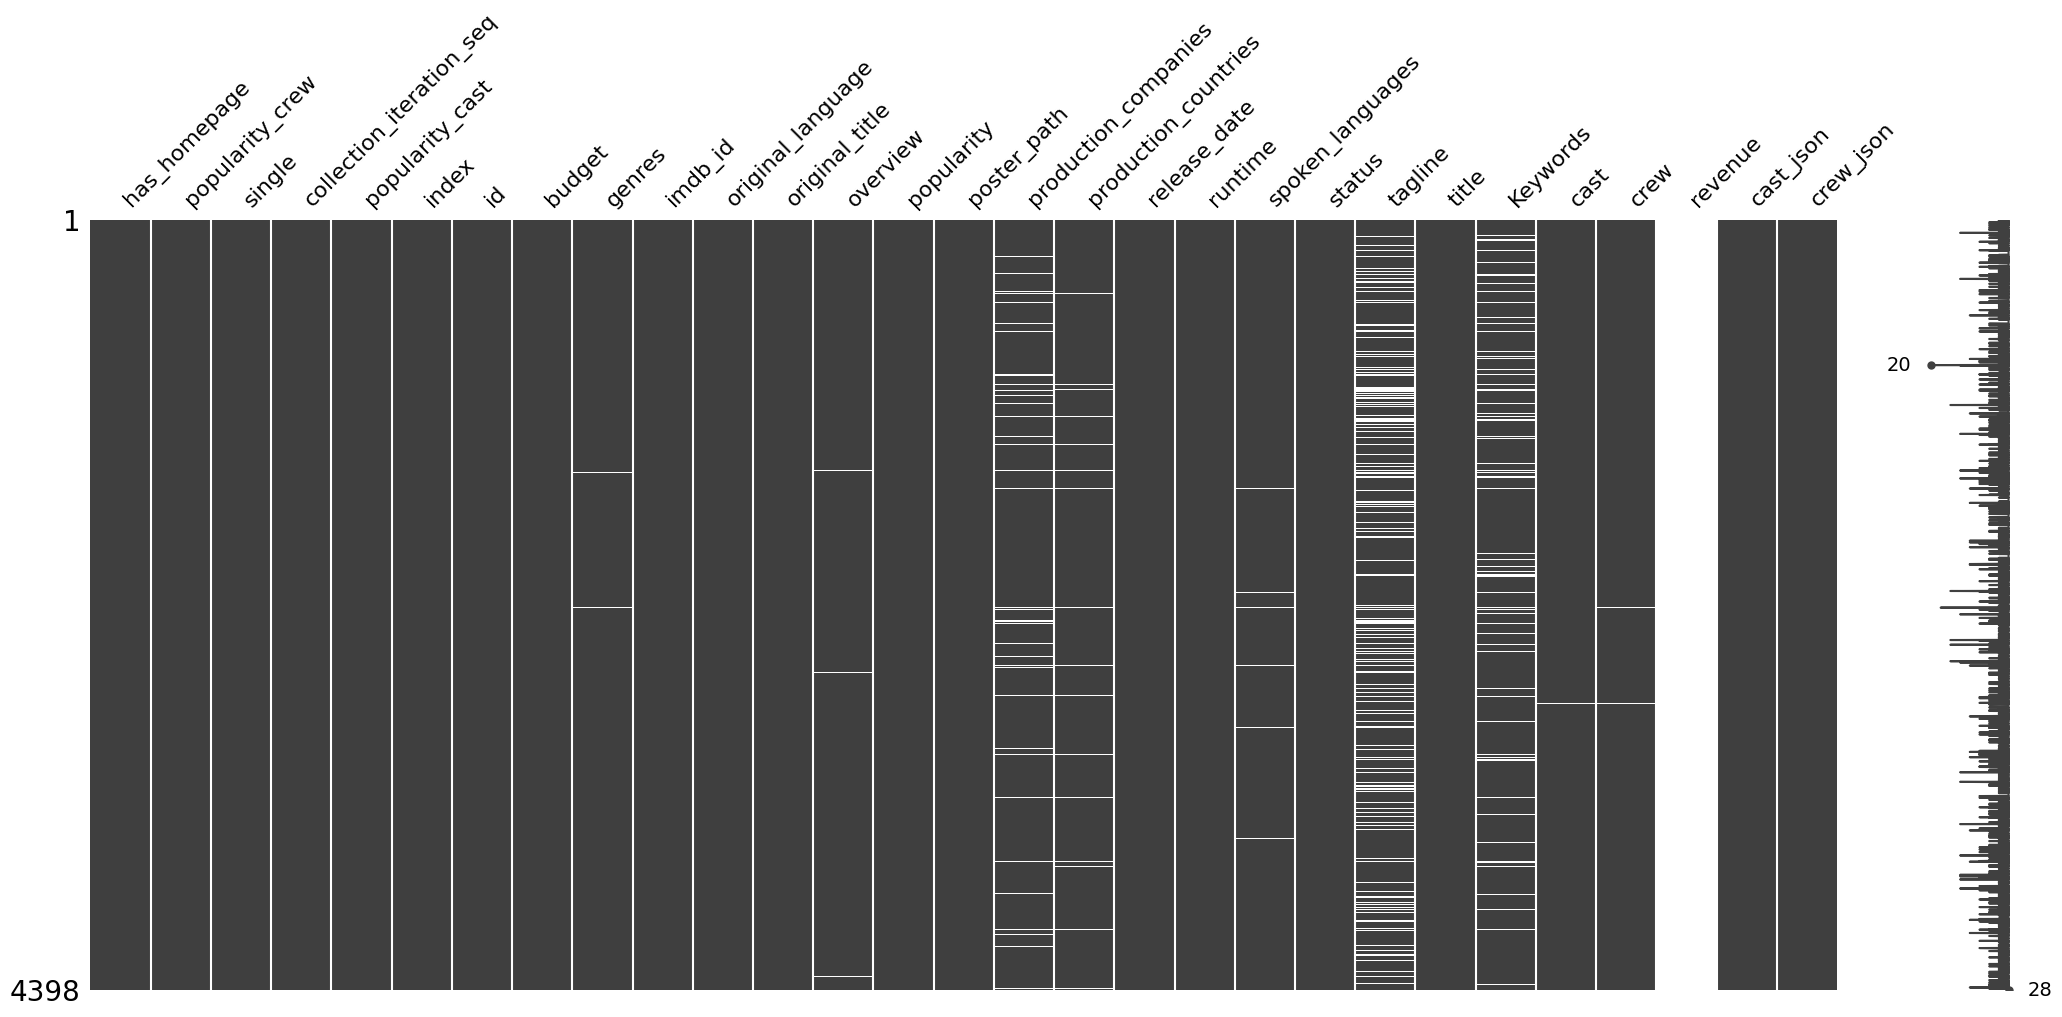

In [122]:
mno.matrix(df_test,(20,6))

In [123]:
df_test.describe()

,has_homepage,popularity_crew,single,collection_iteration_seq,popularity_cast,index,id,budget,popularity,runtime,revenue
count,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4.398000e+03,4398.000000,4394.000000,0.0
mean,0.322874,9.316517,0.800591,0.800591,9.320634,2198.500000,5199.500000,2.264929e+07,8.550230,107.622212,NaN
std,0.467628,5.771502,0.399601,0.399601,6.069339,1269.737571,1269.737571,3.689991e+07,12.209014,21.058290,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3001.000000,0.000000e+00,0.000001,0.000000,NaN
25%,0.000000,6.291741,1.000000,1.000000,6.895044,1099.250000,4100.250000,0.000000e+00,3.895186,94.000000,NaN
50%,0.000000,9.217515,1.000000,1.000000,9.183680,2198.500000,5199.500000,7.450000e+06,7.482242,104.000000,NaN
75%,1.000000,11.644614,1.000000,1.000000,11.126791,3297.750000,6298.750000,2.800000e+07,10.938524,118.000000,NaN
max,1.000000,96.271672,1.000000,1.000000,159.591098,4397.000000,7398.000000,2.600000e+08,547.488298,320.000000,NaN


### LinearRegressor

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   popularity_crew           2998 non-null   float64
 1   collection_iteration_seq  2998 non-null   int64  
 2   popularity_cast           2998 non-null   float64
 3   budget                    2998 non-null   int64  
 4   popularity                2998 non-null   float64
 5   runtime                   2998 non-null   float64
 6   revenue                   2998 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 187.4 KB


Training models: 100%|██████████| 1/1 [00:00<00:00,  1.95LinearRegression/s]


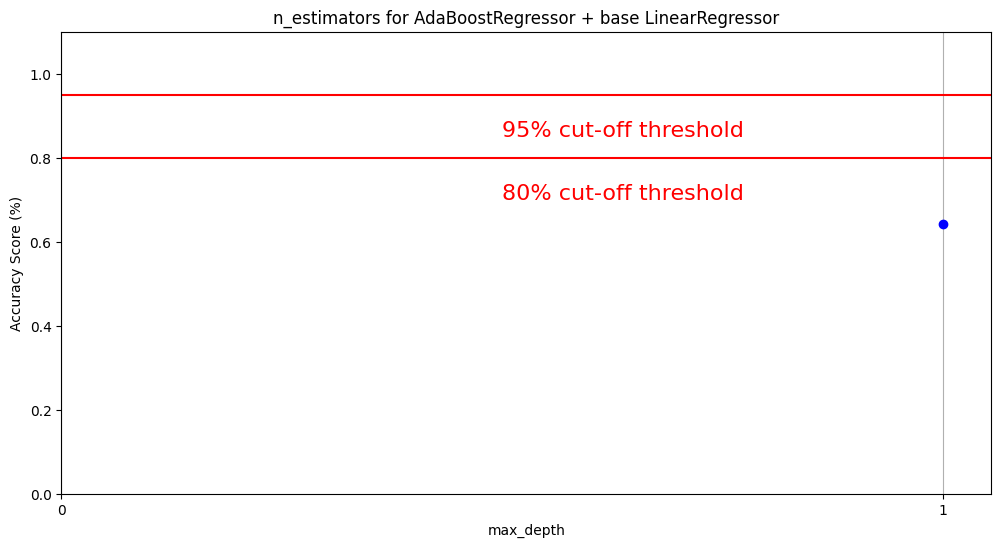

In [124]:
# Training the model
X = df_train.drop(['single','has_homepage','cast_json','crew_json','crew','cast','Keywords','title','tagline','status','spoken_languages','release_date','production_companies','production_countries','poster_path','overview','original_title','original_language','imdb_id','genres','id','index'], axis=1)
X.dropna(inplace=True)
X.info()
y = X['revenue'].to_numpy()
X.drop(['revenue'],axis=1,inplace=True)
X = X.to_numpy()

# This makes it so the model test later sees data it's seen before
# This concept stinks, but we want to maximize the amount of data we use for training too.

_, X_test, _, y_test = train_test_split(
     X, y, test_size=0.33)

X_train = X
y_train = y

import sklearn.ensemble as ske
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

train_scores = []
lr_models = []
max_depth_k = 2 # After about depth 14 the score stays stagnant
for k in tqdm(range(1,max_depth_k),desc="Training models",unit="LinearRegression"):
  #regr = DecisionTreeRegressor(max_depth=k)
  #rfeRegr = ske.RandomForestRegressor(max_depth=k)
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  train_scores.append(lr.score(X_train, y_train))
  lr_models.append(lr)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, max_depth_k, step=1)
y = train_scores

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('max_depth')
plt.xticks(np.arange(0, max_depth_k, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Accuracy Score (%)')
plt.title('n_estimators for AdaBoostRegressor + base LinearRegressor')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.70, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


In [125]:
## pip installpydotplus

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# This can show a decision tree for RandomForestRegressor
#gvz = export_graphviz(selected_model.estimators_[0]) 
#graph = pydotplus.graph_from_dot_data(gvz) 
#Image(graph.create_png())

### RandomForestRegressor

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   popularity_crew           2998 non-null   float64
 1   collection_iteration_seq  2998 non-null   int64  
 2   popularity_cast           2998 non-null   float64
 3   budget                    2998 non-null   int64  
 4   popularity                2998 non-null   float64
 5   runtime                   2998 non-null   float64
 6   revenue                   2998 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 187.4 KB


Training models: 100%|██████████| 20/20 [00:45<00:00,  2.28s/RandomForestRegressor]


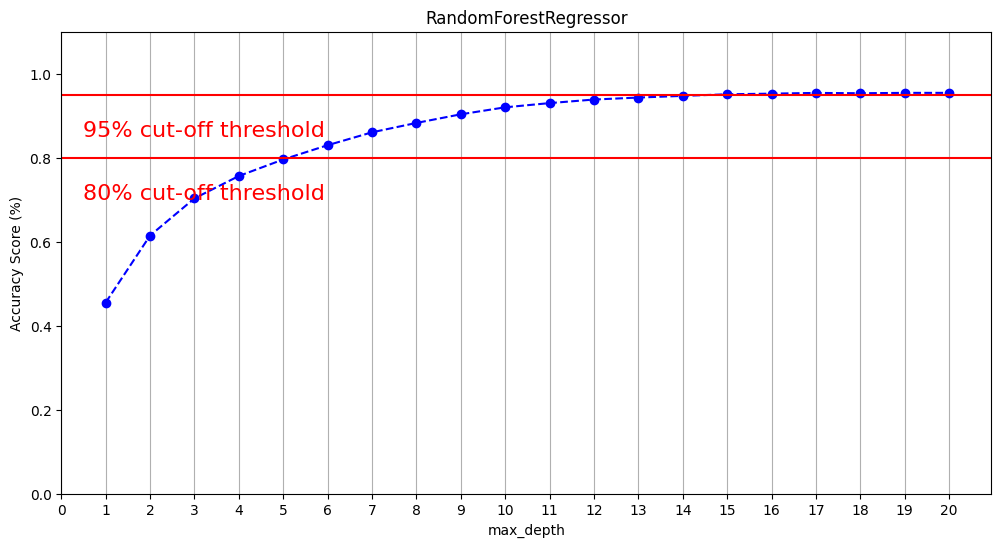

In [126]:
# Training the model
X = df_train.drop(['single','has_homepage','cast_json','crew_json','crew','cast','Keywords','title','tagline','status','spoken_languages','release_date','production_companies','production_countries','poster_path','overview','original_title','original_language','imdb_id','genres','id','index'], axis=1)
X.dropna(inplace=True)
X.info()
y = X['revenue'].to_numpy()
X.drop(['revenue'],axis=1,inplace=True)
X = X.to_numpy()

# This makes it so the model test later sees data it's seen before
# This concept stinks, but we want to maximize the amount of data we use for training too.

_, X_test, _, y_test = train_test_split(
     X, y, test_size=0.33)

X_train = X
y_train = y

import sklearn.ensemble as ske
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression

train_scores = []
random_forest_models = []
max_depth_k = 21 # After about depth 14 the score stays stagnant
for k in tqdm(range(1,max_depth_k),desc="Training models",unit="RandomForestRegressor"):
  #regr = DecisionTreeRegressor(max_depth=k)
  regr = ske.RandomForestRegressor(max_depth=k)
  #regr = ske.AdaBoostRegressor(base_estimator=rfeRegr,n_estimators=100)
  regr.fit(X_train, y_train)
  train_scores.append(regr.score(X_train, y_train))
  random_forest_models.append(regr)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, max_depth_k, step=1)
y = train_scores

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('max_depth')
plt.xticks(np.arange(0, max_depth_k, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Accuracy Score (%)')
plt.title('RandomForestRegressor')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.70, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


### DecisionTreeRegressor

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   popularity_crew           2998 non-null   float64
 1   collection_iteration_seq  2998 non-null   int64  
 2   popularity_cast           2998 non-null   float64
 3   budget                    2998 non-null   int64  
 4   popularity                2998 non-null   float64
 5   runtime                   2998 non-null   float64
 6   revenue                   2998 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 187.4 KB


Training models: 100%|██████████| 20/20 [00:00<00:00, 68.22DecisionTreeRegressor/s] 


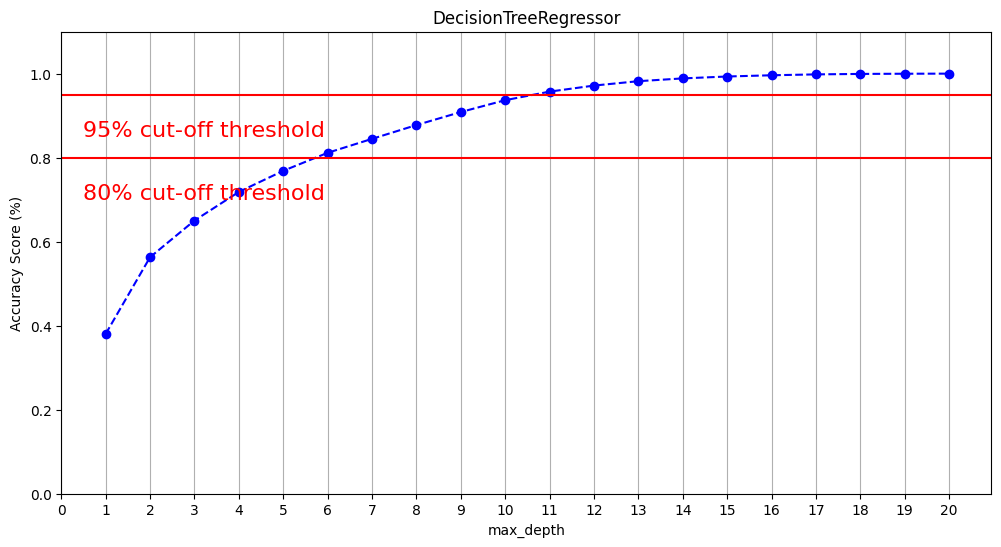

In [127]:
# Training the model
X = df_train.drop(['single','has_homepage','cast_json','crew_json','crew','cast','Keywords','title','tagline','status','spoken_languages','release_date','production_companies','production_countries','poster_path','overview','original_title','original_language','imdb_id','genres','id','index'], axis=1)
X.dropna(inplace=True)
X.info()
y = X['revenue'].to_numpy()
X.drop(['revenue'],axis=1,inplace=True)
X = X.to_numpy()

# This makes it so the model test later sees data it's seen before
# This concept stinks, but we want to maximize the amount of data we use for training too.

_, X_test, _, y_test = train_test_split(
     X, y, test_size=0.33)

X_train = X
y_train = y

import sklearn.ensemble as ske
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression

train_scores = []
decision_tree_models = []
max_depth_k = 21 # After about depth 14 the score stays stagnant
for k in tqdm(range(1,max_depth_k),desc="Training models",unit="DecisionTreeRegressor"):
  regr = DecisionTreeRegressor(max_depth=k)
  #regr = ske.RandomForestRegressor(max_depth=k)
  #regr = ske.AdaBoostRegressor(base_estimator=rfeRegr,n_estimators=100)
  regr.fit(X_train, y_train)
  train_scores.append(regr.score(X_train, y_train))
  decision_tree_models.append(regr)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, max_depth_k, step=1)
y = train_scores

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('max_depth')
plt.xticks(np.arange(0, max_depth_k, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Accuracy Score (%)')
plt.title('DecisionTreeRegressor')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.70, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


### AdaBoost + LinearRegression

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   popularity_crew           2998 non-null   float64
 1   collection_iteration_seq  2998 non-null   int64  
 2   popularity_cast           2998 non-null   float64
 3   budget                    2998 non-null   int64  
 4   popularity                2998 non-null   float64
 5   runtime                   2998 non-null   float64
 6   revenue                   2998 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 187.4 KB


Training models:   0%|          | 0/1 [00:00<?, ?LinearRegression/s]c:\Python\Python39\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

Training models: 100%|██████████| 1/1 [00:00<00:00,  2.08LinearRegression/s]


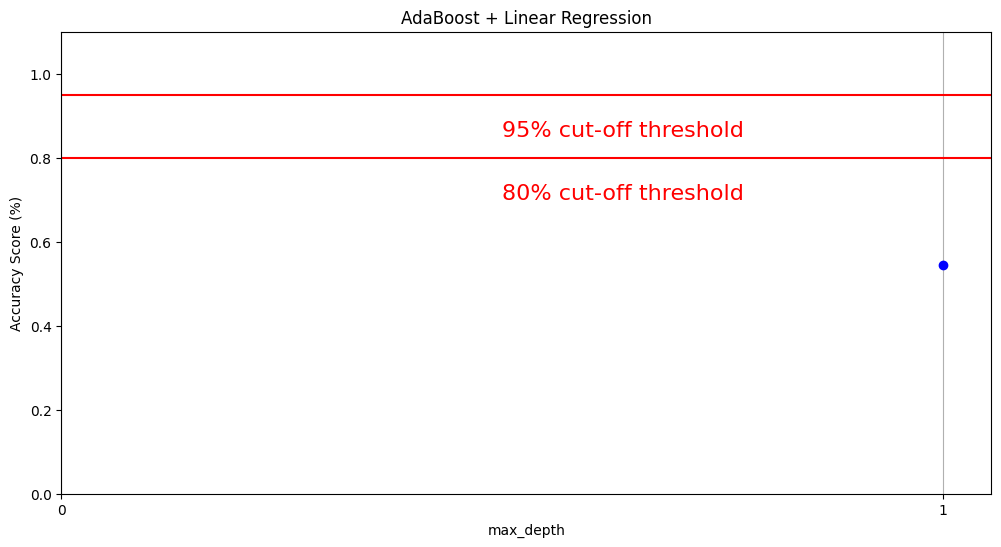

In [128]:
# Training the model
X = df_train.drop(['single','has_homepage','cast_json','crew_json','crew','cast','Keywords','title','tagline','status','spoken_languages','release_date','production_companies','production_countries','poster_path','overview','original_title','original_language','imdb_id','genres','id','index'], axis=1)
X.dropna(inplace=True)
X.info()
y = X['revenue'].to_numpy()
X.drop(['revenue'],axis=1,inplace=True)
X = X.to_numpy()

# This makes it so the model test later sees data it's seen before
# This concept stinks, but we want to maximize the amount of data we use for training too.

_, X_test, _, y_test = train_test_split(
     X, y, test_size=0.33)

X_train = X
y_train = y

import sklearn.ensemble as ske
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

train_scores = []
ada_lr_models = []
max_depth_k = 2 # After about depth 14 the score stays stagnant
for k in tqdm(range(1,max_depth_k),desc="Training models",unit="LinearRegression"):
  #regr = DecisionTreeRegressor(max_depth=k)
  #rfeRegr = ske.RandomForestRegressor(max_depth=k)
  lr = LinearRegression()
  regr = ske.AdaBoostRegressor(base_estimator=lr)
  regr.fit(X_train, y_train)
  train_scores.append(regr.score(X_train, y_train))
  ada_lr_models.append(regr)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, max_depth_k, step=1)
y = train_scores

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('max_depth')
plt.xticks(np.arange(0, max_depth_k, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Accuracy Score (%)')
plt.title('AdaBoost + Linear Regression')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.70, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


### AdaBoost + RandomForest

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   popularity_crew           2998 non-null   float64
 1   collection_iteration_seq  2998 non-null   int64  
 2   popularity_cast           2998 non-null   float64
 3   budget                    2998 non-null   int64  
 4   popularity                2998 non-null   float64
 5   runtime                   2998 non-null   float64
 6   revenue                   2998 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 187.4 KB


Training models:   0%|          | 0/14 [00:00<?, ?AdaBoostRegressor/s]c:\Python\Python39\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

Training models:   7%|▋         | 1/14 [00:06<01:28,  6.79s/AdaBoostRegressor]c:\Python\Python39\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

Training models:  14%|█▍        | 2/14 [00:12<01:12,  6.03s/AdaBoostRegressor]c:\Python\Python39\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

Training models:  21%|██▏       | 3/14 [00:22<01:26,  7.87s/AdaBoostRegressor]c:\Python\Python39\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

Training

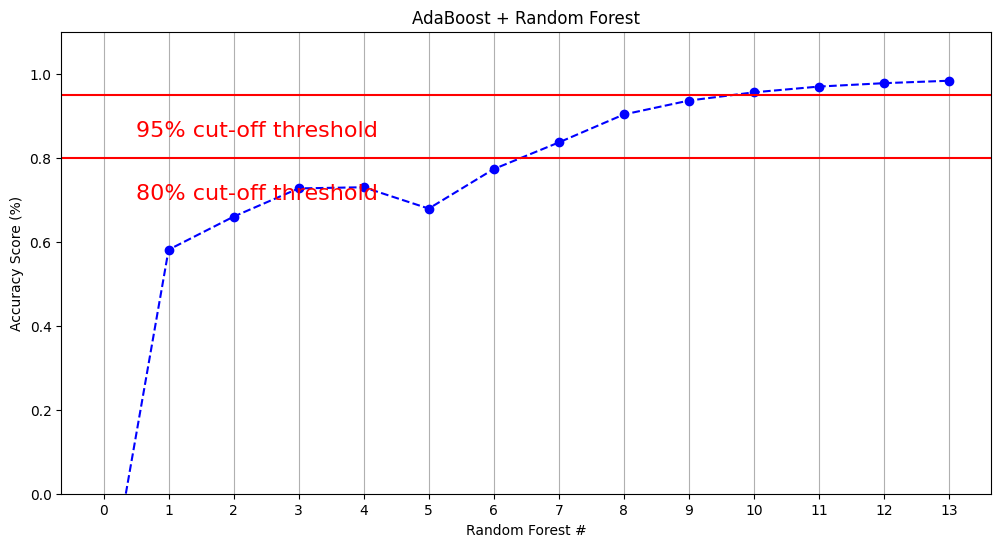

In [129]:
# SLOW! ~10-15 minutes
# Training the model
X = df_train.drop(['single','has_homepage','cast_json','crew_json','crew','cast','Keywords','title','tagline','status','spoken_languages','release_date','production_companies','production_countries','poster_path','overview','original_title','original_language','imdb_id','genres','id','index'], axis=1)
X.dropna(inplace=True)
X.info()
y = X['revenue'].to_numpy()
X.drop(['revenue'],axis=1,inplace=True)
X = X.to_numpy()

# This makes it so the model test later sees data it's seen before
# This concept stinks, but we want to maximize the amount of data we use for training too.

_, X_test, _, y_test = train_test_split(
     X, y, test_size=0.33)

X_train = X
y_train = y

import sklearn.ensemble as ske
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression

train_scores = []
ada_rf_models = []
max_depth_k = 14 # After about depth 15 it's useless to keep trying
for k in tqdm(range(0,max_depth_k),desc="Training models",unit="AdaBoostRegressor"):
  #regr = DecisionTreeRegressor(max_depth=k)
  #rfeRegr = ske.RandomForestRegressor(max_depth=k)
  regr = ske.AdaBoostRegressor(base_estimator=random_forest_models[k])
  regr.fit(X_train, y_train)
  train_scores.append(regr.score(X_train, y_train))
  ada_rf_models.append(regr)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(0, max_depth_k, step=1)
y = train_scores

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Random Forest #')
plt.xticks(np.arange(0, max_depth_k, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Accuracy Score (%)')
plt.title('AdaBoost + Random Forest')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.70, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

### AdaBoost + DecisionTree

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   popularity_crew           2998 non-null   float64
 1   collection_iteration_seq  2998 non-null   int64  
 2   popularity_cast           2998 non-null   float64
 3   budget                    2998 non-null   int64  
 4   popularity                2998 non-null   float64
 5   runtime                   2998 non-null   float64
 6   revenue                   2998 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 187.4 KB


Training models:   0%|          | 0/20 [00:00<?, ?AdaBoostRegressor/s]c:\Python\Python39\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

Training models:   5%|▌         | 1/20 [00:00<00:07,  2.41AdaBoostRegressor/s]c:\Python\Python39\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

Training models:  10%|█         | 2/20 [00:01<00:10,  1.65AdaBoostRegressor/s]c:\Python\Python39\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

Training models:  15%|█▌        | 3/20 [00:01<00:10,  1.69AdaBoostRegressor/s]c:\Python\Python39\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

Training

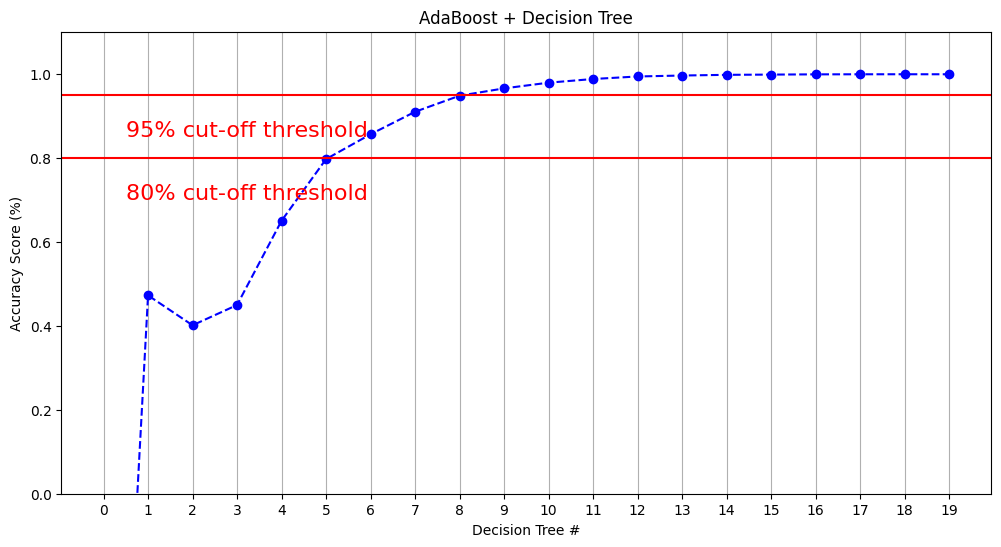

In [130]:
# Training the model
X = df_train.drop(['single','has_homepage','cast_json','crew_json','crew','cast','Keywords','title','tagline','status','spoken_languages','release_date','production_companies','production_countries','poster_path','overview','original_title','original_language','imdb_id','genres','id','index'], axis=1)
X.dropna(inplace=True)
X.info()
y = X['revenue'].to_numpy()
X.drop(['revenue'],axis=1,inplace=True)
X = X.to_numpy()

# This makes it so the model test later sees data it's seen before
# This concept stinks, but we want to maximize the amount of data we use for training too.

_, X_test, _, y_test = train_test_split(
     X, y, test_size=0.33)

X_train = X
y_train = y

import sklearn.ensemble as ske
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression

train_scores = []
ada_dt_models = []
max_depth_k = 20 # After about depth 14 the score stays stagnant
for k in tqdm(range(0,max_depth_k),desc="Training models",unit="AdaBoostRegressor"):
  #regr = DecisionTreeRegressor(max_depth=k)
  #rfeRegr = ske.RandomForestRegressor(max_depth=k)
  regr = ske.AdaBoostRegressor(base_estimator=decision_tree_models[k])
  regr.fit(X_train, y_train)
  train_scores.append(regr.score(X_train, y_train))
  ada_dt_models.append(regr)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(0, max_depth_k, step=1)
y = train_scores

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Decision Tree #')
plt.xticks(np.arange(0, max_depth_k, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Accuracy Score (%)')
plt.title('AdaBoost + Decision Tree')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.70, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


### GradientBoostRegressor + RandomForest

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   popularity_crew           2998 non-null   float64
 1   collection_iteration_seq  2998 non-null   int64  
 2   popularity_cast           2998 non-null   float64
 3   budget                    2998 non-null   int64  
 4   popularity                2998 non-null   float64
 5   runtime                   2998 non-null   float64
 6   revenue                   2998 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 187.4 KB


Training models: 100%|██████████| 20/20 [01:36<00:00,  4.83s/GradientBoostingRegressor]


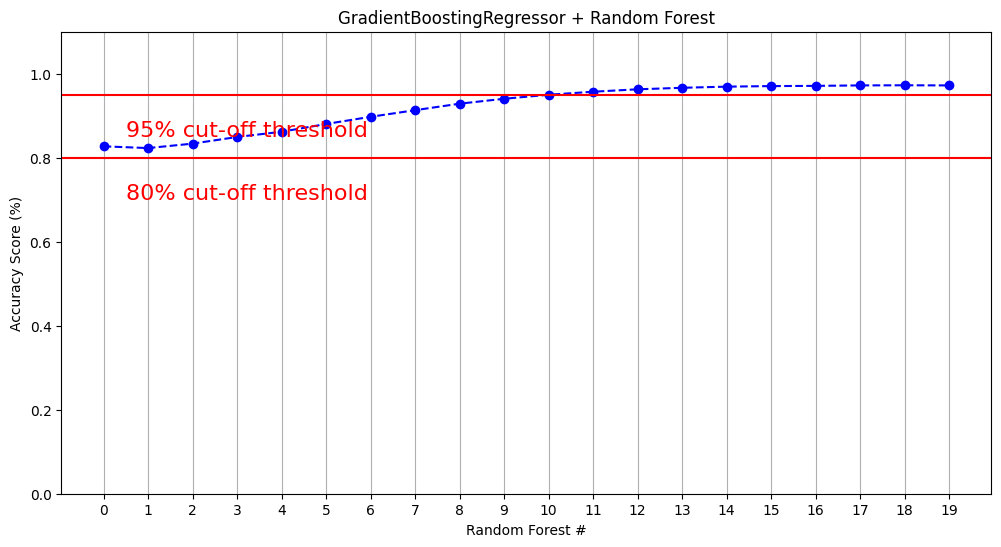

In [131]:
# Training the model
X = df_train.drop(['single','has_homepage','cast_json','crew_json','crew','cast','Keywords','title','tagline','status','spoken_languages','release_date','production_companies','production_countries','poster_path','overview','original_title','original_language','imdb_id','genres','id','index'], axis=1)
X.dropna(inplace=True)
X.info()
y = X['revenue'].to_numpy()
X.drop(['revenue'],axis=1,inplace=True)
X = X.to_numpy()

# This makes it so the model test later sees data it's seen before
# This concept stinks, but we want to maximize the amount of data we use for training too.

_, X_test, _, y_test = train_test_split(
     X, y, test_size=0.33)

X_train = X
y_train = y

import sklearn.ensemble as ske
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression

train_scores = []
gb_rf_models = []
max_depth_k = 20 # After about depth 14 the score stays stagnant
for k in tqdm(range(0,max_depth_k),desc="Training models",unit="GradientBoostingRegressor"):
  #regr = DecisionTreeRegressor(max_depth=k)
  #rfeRegr = ske.RandomForestRegressor(max_depth=k)
  regr = ske.GradientBoostingRegressor(init=random_forest_models[k])
  regr.fit(X_train, y_train)
  train_scores.append(regr.score(X_train, y_train))
  gb_rf_models.append(regr)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(0, max_depth_k, step=1)
y = train_scores

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Random Forest #')
plt.xticks(np.arange(0, max_depth_k, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Accuracy Score (%)')
plt.title('GradientBoostingRegressor + Random Forest')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.70, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


### GradientBoostRegressor + DecisionTree

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   popularity_crew           2998 non-null   float64
 1   collection_iteration_seq  2998 non-null   int64  
 2   popularity_cast           2998 non-null   float64
 3   budget                    2998 non-null   int64  
 4   popularity                2998 non-null   float64
 5   runtime                   2998 non-null   float64
 6   revenue                   2998 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 187.4 KB


Training models: 100%|██████████| 20/20 [00:23<00:00,  1.16s/GradientBoostingRegressor]


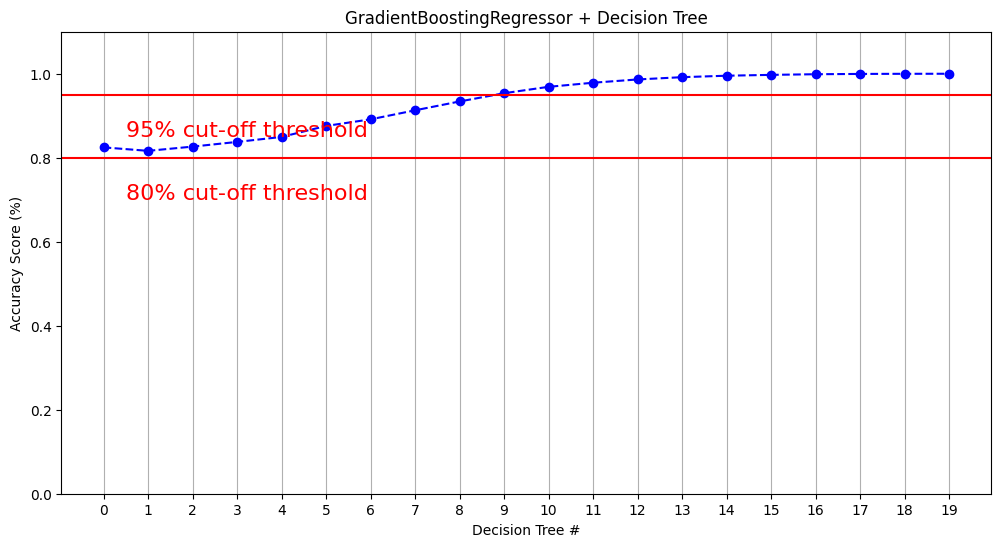

In [132]:
# Training the model
X = df_train.drop(['single','has_homepage','cast_json','crew_json','crew','cast','Keywords','title','tagline','status','spoken_languages','release_date','production_companies','production_countries','poster_path','overview','original_title','original_language','imdb_id','genres','id','index'], axis=1)
X.dropna(inplace=True)
X.info()
y = X['revenue'].to_numpy()
X.drop(['revenue'],axis=1,inplace=True)
X = X.to_numpy()

# This makes it so the model test later sees data it's seen before
# This concept stinks, but we want to maximize the amount of data we use for training too.

_, X_test, _, y_test = train_test_split(
     X, y, test_size=0.33)

X_train = X
y_train = y

import sklearn.ensemble as ske
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression

train_scores = []
gb_dt_models = []
max_depth_k = 20 # After about depth 14 the score stays stagnant
for k in tqdm(range(0,max_depth_k),desc="Training models",unit="GradientBoostingRegressor"):
  #regr = DecisionTreeRegressor(max_depth=k)
  #rfeRegr = ske.RandomForestRegressor(max_depth=k)
  regr = ske.GradientBoostingRegressor(init=decision_tree_models[k])
  regr.fit(X_train, y_train)
  train_scores.append(regr.score(X_train, y_train))
  gb_dt_models.append(regr)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(0, max_depth_k, step=1)
y = train_scores

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Decision Tree #')
plt.xticks(np.arange(0, max_depth_k, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Accuracy Score (%)')
plt.title('GradientBoostingRegressor + Decision Tree')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.70, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


# Output

In [133]:
import datetime

def generate_submission(X, model, name):
    y_submit = model.predict(X)
    submit_list = []
    idx = 3001
    for y in y_submit:
        submit_list.append({'id': idx, 'revenue': y})
        idx+=1

    submission = pd.DataFrame(submit_list)
    timestamp = datetime.datetime.now().isoformat()
    sanitized_name = "".join([c for c in name if re.match(r'\w', c)])
    submission.to_csv(output_path + sanitized_name + "-" + timestamp + ".csv", index=False)
    print(name + " output available!")

In [134]:
selected_models = [
    {
        'name': 'RandomForest - max depth 5',
        'model': random_forest_models[4]
    },
    {
        'name': 'RandomForest - max depth 12',
        'model': random_forest_models[11]
    },
    {
        'name': 'DecisionTree - max depth 6',
        'model': random_forest_models[5]
    },
    {
        'name': 'DecisionTree - max depth 11',
        'model': decision_tree_models[10]
    },
    {
        'name': 'AdaBoost + RandomForest 8',
        'model': ada_rf_models[7]
    },
    {
        'name': 'AdaBoost + RandomForest 11',
        'model': ada_rf_models[10]
    },
    {
        'name': 'AdaBoost + DecisionTree 6',
        'model': ada_dt_models[5]
    },
    {
        'name': 'AdaBoost + DecisionTree 9',
        'model': ada_dt_models[8]
    },
    {
        'name': 'GradientBoostRegressor + RandomForest 5',
        'model': gb_rf_models[4]
    },
    {
        'name': 'GradientBoostRegressor + RandomForest 11',
        'model': gb_rf_models[10]
    },
    {
        'name': 'GradientBoostRegressor + DecisionTree 5',
        'model': gb_rf_models[4]
    },
    {
        'name': 'GradientBoostRegressor + DecisionTree 10',
        'model': gb_rf_models[9]
    }
]

print("Loaded models for submission")
for m in selected_models:
    print(m['model'])

Loaded models for submission
RandomForestRegressor(max_depth=5)
RandomForestRegressor(max_depth=12)
RandomForestRegressor(max_depth=6)
DecisionTreeRegressor(max_depth=11)
AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=8))
AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=11))
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=6))
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=9))
GradientBoostingRegressor(init=RandomForestRegressor(max_depth=5))
GradientBoostingRegressor(init=RandomForestRegressor(max_depth=11))
GradientBoostingRegressor(init=RandomForestRegressor(max_depth=5))
GradientBoostingRegressor(init=RandomForestRegressor(max_depth=10))


In [135]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


df_test.info()
dropped_features = ['single','has_homepage','cast_json','crew_json','crew','cast','Keywords','title','tagline','status','spoken_languages','release_date','production_companies','production_countries','poster_path','overview','original_title','original_language','imdb_id','genres','id','index']
df_submit = df_test.drop(dropped_features, axis=1)
df_runtime_null = df_submit[df_submit['runtime'].isna()]
df_runtime_complete = df_submit[df_submit['runtime'].notna()]

runtime_imputer = IterativeImputer(random_state=42)

runtime_imputer.fit(df_runtime_complete)
runtimes = runtime_imputer.transform(df_runtime_null)
#print(runtimes)
runtime_null = df_runtime_null.to_dict('index')
it = 0
for k in runtime_null:
    v = runtime_null[k]
    df_submit.at[k,'runtime'] = runtimes[it][5]
    it+=1
    
df_submit.info()

X_submit = df_submit.drop(['revenue'],axis=1).to_numpy()
for m in selected_models:
    generate_submission(X_submit, m['model'], m['name'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 3000 to 7397
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   has_homepage              4398 non-null   int64         
 1   popularity_crew           4398 non-null   float64       
 2   single                    4398 non-null   int64         
 3   collection_iteration_seq  4398 non-null   int64         
 4   popularity_cast           4398 non-null   float64       
 5   index                     4398 non-null   int64         
 6   id                        4398 non-null   int64         
 7   budget                    4398 non-null   int64         
 8   genres                    4382 non-null   object        
 9   imdb_id                   4398 non-null   object        
 10  original_language         4398 non-null   object        
 11  original_title            4398 non-null   object        
 12  overview         

OSError: [Errno 22] Invalid argument: './RandomForestmaxdepth5-2023-04-27T21:50:05.757805.csv'

In [ ]:
timestamp = datetime.datetime.now().isoformat()
!zip -r9 outputs-{timestamp}.zip *.csv